# Machine Learning VS Deep Learning: House Prices
By: Bettina Marksteiner and Sushant Bharadwaj Kagolanu

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Introduction of the Project
CIS 4526: Foundations of Machine Learning \
Project 3 - Reproducing and Explaining Results Achieved with a ML Model

House prices are the pinnacle of practical real-estate exploration and pursuit. This single metric or variable involves many stakeholders within the real-estate world. Sales of houses are relevant to everybody, whether you are a real-estate agent, a buyer, a seller, or simply a bystander. Understanding the value of vital properties within a specific area that impacts your needs or lifestyle is extremely significant. As a seller, if you are not aware of the general expected sales of houses within the area, you will lose out on potential sales. As a buyer, if you are not aware of the general expected sales of houses within the area, you might not have the necessesary knowledge to depict cheap houses for the area, which may inadvertently lead to you paying an inconvenient amount for a below average property for the area. As a bystander, it is great to know the general growth of sales within the area to delve into possibilities of selling or buying other properties. This is an essential metric or variable that everyone needs to be aware of. However, any inaccuracy in depicting house prices for heavy, long-term decision-making will absolutely hinder future choices. To be able to accurately predict for house prices while extrating from a labeled dataset implies the need for machine learning. We require the predicting power of an appropriate machine learning model for this problem to accurately predict the house price of an unseen instance by giving it features that describe the house. Machine learning is most appropriate for this problem as it will allow us to analyze data, find patterns, interpret key correlated features, and continually decrease the cost function without overfitting. This will allow you to better accurately depict house prices for all stakeholders.

The theme of this project will be the exploration between traditional machine learning models and deep learning. Although machine learning and deep learning are both subsets of artificial intelligence, they have core differences in terms of how they get their predictive power and their general complexities. From the available set of traditional machine learning models, there are various models with different approaches and complexities. They typically excel working with structured data and interpretable patterns. Whereas deep learning models typically require a large amount of data to recognize complex patterns from even unstructured datasets, which is why it is most prevalent in image and text applications. 

In this notebook we will do the following:
* Introducing the dataset
* Describe and understand the dataset we are working with
* Review the dataset and apply surface-level EDA, data cleaning and transformation to make it viable for the training of the machine learning models we will be working with
* Select traditional machine learning models and a deep learning model best suited for the problem
* Conduct any necessary feature engineering and hyperparameter-tuning for increasing the performances of the models
* Select required performance metrics for the entire project
* Working with training data and reviewing its performance on validation data through every iteration
* Reviewing alternatives for further improvements
* Compare and analyze results of the models' predictions on test data
* Conclude findings on the performance measures from the best models with inferences drawn about the problem, dataset, and the practicality between traditional machine learning and deep learning models.

## About the Dataset
For this project, we will be working with the "House Sales in King County, USA" dataset from Kaggle's available datasets. For simplicity, we have downloaded the csv. of the dataset manually to store the dataset locally within the project directory for reproducibility purposes. We retrieved the dataset from the Kaggle source:\
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?select=kc_house_data.csv

The dataset we are working with contains instances describing the official houses sold between May 2014 and May 2015 in King County, Washington, which includes the city of Seattle. This dataset is openly known for being useful for predicting house prices with regression models. It will allow us to better focus on determining the performance of our selected models while drawing inferences regarding the differences between traditional machine learning models and the used deep learning model. We will use this dataset to delve into data analysis, feature engineering, and building a strong prediction model best suitable for our problem. 

Here are the descriptions of each variable within the dataset:
* id - Primary key that indexes each instance with a unique ID.
* date - Date of the home sale.
* price - Price of each home sold.
* bedrooms - Number of bedrooms.
* bathrooms - Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower. A typical bathroom contains a sink, toilet, shower, and a bathtub. Each component has a value of 0.25.
* sqft_living - Square footage of the apartments interior living space.
* sqft_lot - Square footage of the land space.
* floors - Number of floors.
* waterfront - A variable depicting whether the apartment was overlooking the waterfront or not.
* view - An index from 0 to 4 of how good the view of the property was.
* condition - An index from 1 to 5 on the condition of the apartment, using King County government standards.
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space excluding basement. It is an interaction term that computes: sqft_above = sqft_living - sqft_basement
* sqft_basement - The square footage of the interior housing space that is below ground level.
* yr_built - The year the house was initially built.
* yr_renovated - The year of the house’s last renovation. It is 0 if it was never renovated.
* zipcode - What zipcode area the house is in.
* lat - Lattitude of the area it belongs to.
* long - Longitude of the area it belongs to.
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors.
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors.

Descriptons verified from 2 sources:

Murillo, JuanPablo. “King County Home Sales: Analysis and the Limitations of a Multiple Regression Model.” Rstudio-Pubs-Static.s3.Amazonaws.com, 23 Feb. 2016, rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html. Accessed 10 July 2025.\
Pawan Shivhare. “Predicting King County House Prices.” SlideShare, Slideshare, 2015, www.slideshare.net/slideshow/predicting-king-county-house-prices/79666972. Accessed 10 July 2025.

Regarding the scales of building grade and condition, these are practical scales that follow the government standards specifically in King County.

Building grade - represents the construction quality of improvements:
* 1-3 - Falls short of minimum building standards. Normally cabin or inferior structure.
* 4 - Generally older, low quality construction. Does not meet code.
* 5 - Low construction costs and workmanship. Small, simple design.
* 6 - Lowest grade currently meeting building code. Low quality materials and simple designs.
* 7 - Average grade of construction and design. Commonly seen in plats and older sub-divisions.
* 8 - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* 9 - Better architectural design with extra interior and exterior design and quality.
* 10 - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
* 11 - Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
* 12 - Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
* 13 - Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Building condition - relative to age and grade:
* 1 = Poor / Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
* 2 = Fair / Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
* 3 = Average. Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
* 4 = Good. No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
* 5 = Very Good. All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

The descriptions of scales for King County are retrieved from the official source:
“ESales - King County.” Kingcounty.gov, 2021, info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#top. Accessed 11 July 2025.

In general, this is a large dataset of house sales which is most suitable for our project. The dataset consists of a wide range of features with complicated relationships and patterns, which emphasizes our need for machine learning. Let us now explore the dataset.

## Loading the Data

In [5]:
datasetHousePrices = pd.read_csv("kc_house_data.csv")

## Exploring the Dataset Structure

In [6]:
datasetHousePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
datasetHousePrices.isna().any

<bound method DataFrame.any of           id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0    

In [8]:
datasetHousePrices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
datasetHousePrices.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Initial Findings
The initial scan showed that the dataset is already cleaned as it shows no non-null entries are present. But we still have to check for any unrealistic data entries or outliers. \
The dataset has 21 columns and 21613 entries. \
This dataset is quite large which makes it perfect to train machine learning models, especially traditional ones. For Deep Learning, the larger the dataset, the better but this dataset should be sufficient. \
All of the parameters in this dataset seem to be important but we will perform some feature engineering which includes the following:
* dropping the ID as it is useless for training a MLM because it simply labels the entries
* dropping the zipcode because we already have lat and long which we can use to show the data on a map more accurately
* transforming the date format to be: day and month in seperate columns to clearer data
* adding a boolean variable isRenovated to check if this information is already sufficient enough rather than the renovation date
* adding an age parameter to show the actual age of the house at the point of selling

First we drop the columns ID and Zipcode like mentioned before.

In [10]:
datasetHousePrices = datasetHousePrices.drop(['id'], axis=1)
datasetHousePrices = datasetHousePrices.drop(['zipcode'], axis=1)
datasetHousePrices.shape

(21613, 19)

## Cleaning and Transformations

Now, let's do the following:
* transform the date to monthSold and yearSold
*   once we transform the date, we can drop the original date column as we now have all the details we need. The day sold is not important since grouping by month is sufficient to draw conclusions based on the month or year a house was sold
* add new column age
* add column is_renovated

In [ ]:
# split to month_sold and yr_sold
# date format is YYYYMMDD
datasetHousePrices['date'] = pd.to_datetime(datasetHousePrices['date'])
datasetHousePrices['month_sold'] = datasetHousePrices['date'].dt.month
datasetHousePrices['yr_sold'] = datasetHousePrices['date'].dt.year

# new column age
datasetHousePrices['age'] = datasetHousePrices['yr_sold'] - datasetHousePrices['yr_built']

datasetHousePrices = datasetHousePrices.drop(['date'], axis = 1)

# new column is_renovated

datasetHousePrices['is_renovated'] = datasetHousePrices['yr_renovated'] != 0

datasetHousePrices.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,47.5112,-122.257,1340,5650,10,2014,59,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,47.7210,-122.319,1690,7639,12,2014,63,True
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,47.7379,-122.233,2720,8062,2,2015,82,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,47.5208,-122.393,1360,5000,12,2014,49,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,47.6168,-122.045,1800,7503,2,2015,28,False


Now, our final dataset will have 22 columns but let's look at some unrealistic datapoints or outliers next! \
First, we will plot some boxplots for an initial analysis.

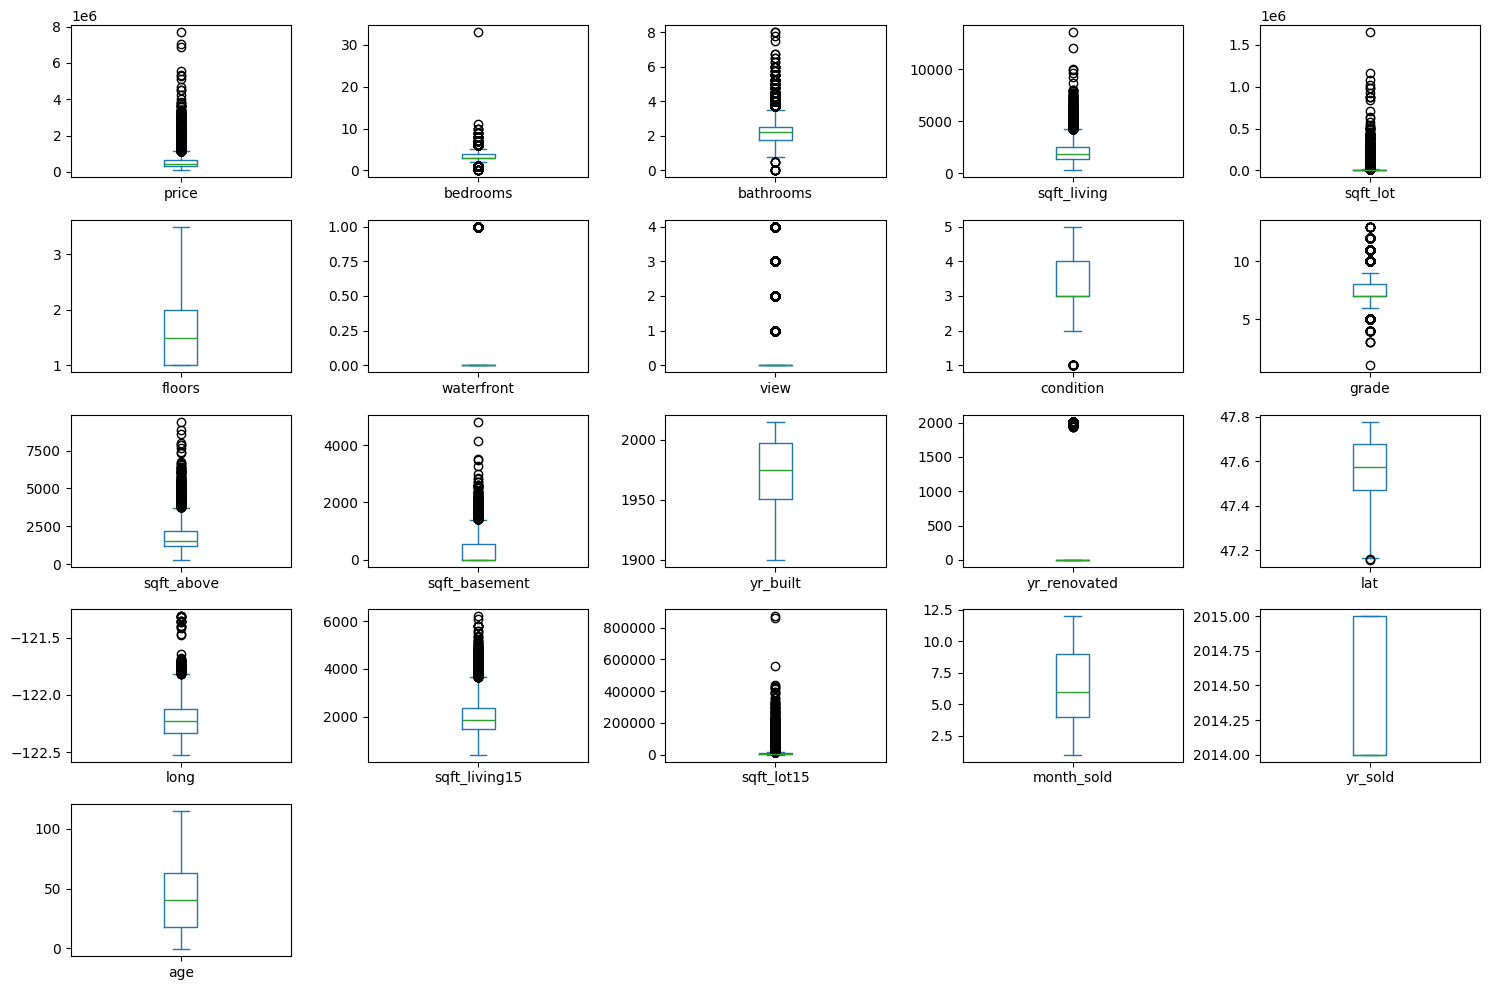

In [12]:
datasetHousePrices.iloc[:, 0:].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

#### Findings
The boxplots show the following:
* the bedrooms seem to have 1 outlier which needs to be investigated and potentially removed
* the bathrooms also seem to have outlier that might have 0 bathrooms which will have to be looked into further
* waterfront can be disregarded as it is a boolean variable with 1(yes) and 0(no) the boxplot simply shows that the median is not being at a waterfront
* the same is for yr_renovated because 0 means it has not been renovated and the others are the years it has been renovated. The boxplot simply shows that the median has not been renovated
* condition: there are a few entries with condition 0 which is realistic since those houses could be just in a very bad condition
* view: the same as for condition. Most houses have a view of 0 which means the view is not cosidered pretty and the scale are integers 0-4

Let's first look into the bathrooms and see what we are working with:

In [13]:
datasetHousePrices["bathrooms"].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.50       2
6.25       2
7.75       1
7.50       1
Name: count, dtype: int64

This shows that there are 10 houses that have 0 bathrooms. \
This statistic is highly unrealistic because every house has to have some sort of bathroom in order to live comfortably. A house with no sort of bathroom makes no sense. \
Additionally, it is only 10 entries that have such statistic so we can safely remove them. 

In [14]:
datasetHousePrices = datasetHousePrices[datasetHousePrices['bathrooms'] != 0]
datasetHousePrices.shape

(21603, 22)

Now that the bathrooms have been fixed, we will look into the bedroom situation becuase we found outliers there:

In [15]:
datasetHousePrices["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
0        6
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [16]:
datasetHousePrices[datasetHousePrices['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age,is_renovated
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,...,1947,0,47.6878,-122.331,1330,4700,6,2014,67,False


This shows that there is one house with 33 bedrooms which seems highly unrealistic. \
When looking at the statistics of this house, we see that the whole living space is 1620 square feet. \
This would mean that the entire house consists of 33 bedrooms which each being 49 square feet (which is around 4.5 square meters for reference) \
This makes no sense at all because this excludes essential living spaces like a bathroom, living room and kitchen etc. \
Because of this, we conclude that this number 33 must be a typo. But we can not be sure about the actual value. So, because it is only one value among thousands, we decided that it is safe to remove this entry.

The next ourlier is one house with 11 bedrooms, so let's pull up the details below:

In [17]:
datasetHousePrices[datasetHousePrices['bedrooms'] == 11]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age,is_renovated
8757,520000.0,11,3.0,3000,4960,2.0,0,0,3,7,...,1918,1999,47.556,-122.363,1420,4960,8,2014,96,True


This house has a much larger living space with 3000 square feet. When calculated only with bedrooms, it would be a house full of eleven 25 square meter bedrooms which is possible. Excluding spaces for kitchen, bathrooms and living room, it still gives plenty of realistic space for 11 bedrooms. This house also has 3 bathrooms which seems sufficient and realistic for 11 bedrooms. It also has 2 floors. \
In conclusion, this is not an outlier or a typo, so we will keep this entry.


In [18]:
datasetHousePrices = datasetHousePrices.drop(15870)



Now Let's look at the final cleaned dataset:

In [19]:
datasetHousePrices.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age
count,2.160200e+04,21602.000000,21602.000000,21602.000000,2.160200e+04,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,...,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000
mean,5.401261e+05,3.370892,2.115753,2080.126146,1.510684e+04,1.494213,0.007546,0.234238,3.409592,7.657532,...,291.630636,1971.006157,84.445237,47.560065,-122.213967,1986.623414,12766.736923,6.574484,2014.322933,43.316776
std,3.671168e+05,0.905733,0.769010,918.161484,4.143004e+04,0.539761,0.086539,0.766309,0.650481,1.173611,...,442.638912,29.374639,401.776985,0.138556,0.140749,685.166307,27309.454207,3.115233,0.467608,29.376717
min,7.800000e+04,0.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000,-1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,47.471025,-122.328000,1490.000000,5100.000000,4.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068475e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10082.250000,9.000000,2015.000000,63.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000,115.000000


In [20]:
datasetHousePrices[datasetHousePrices['age'] == -1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age,is_renovated
1763,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,...,2015,0,47.5784,-122.226,2230,10000,6,2014,-1,False
2687,385195.0,1,1.00,710,6000,1.5,0,0,3,6,...,2015,0,47.5756,-122.316,1440,4800,10,2014,-1,False
7526,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,...,2015,0,47.7685,-122.160,2520,6126,12,2014,-1,False
8039,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,...,2015,0,47.6001,-122.298,1320,1852,6,2014,-1,False
14489,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,...,2015,0,47.6514,-122.385,1570,6000,8,2014,-1,False
17098,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,...,2015,0,47.6074,-122.305,1480,3600,6,2014,-1,False
19805,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,...,2015,0,47.6047,-122.305,1380,1495,8,2014,-1,False
20770,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,...,2015,0,47.7384,-122.348,1970,18110,8,2014,-1,False
20852,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,...,2015,0,47.6725,-122.330,1800,4560,7,2014,-1,False
20963,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,...,2015,0,47.5951,-122.301,1350,3000,7,2014,-1,False


We can see that some houses have an age of -1 but this is completely normal because it means the following: \
The hosue has been sold before its building was complete. \
In real-life, this happens a lot. A lot, if not most houses are being sold before the whole building process has been completely. It is common practice especially with apartments in apartment complexes which often have waitlist. \
Another finding are houses with 0 bedrooms but this too is not unrealistic becuase after some research we found out that those are simply studios. Studios are usually apartments or very small houses that consist of 1 room and some sort of bathroom. The living space size of 370 square feet further strengthens this statement. 

In [21]:
datasetHousePrices[datasetHousePrices['floors'] == 3.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age,is_renovated
10077,435000.0,3,3.00,1440,1350,3.5,0,2,3,8,...,2005,0,47.6525,-122.345,1440,1350,8,2014,9,False
11594,544000.0,3,2.50,1760,1755,3.5,0,0,3,8,...,1998,0,47.6688,-122.279,1700,1721,1,2015,17,False
14885,525000.0,3,3.00,1730,1074,3.5,0,0,3,8,...,2006,0,47.6692,-122.392,1370,1185,4,2015,9,False
15424,479000.0,2,2.50,1730,1037,3.5,0,0,3,8,...,2008,0,47.5594,-122.285,1280,1026,4,2015,7,False
18477,3300000.0,8,4.00,7710,11750,3.5,0,0,5,12,...,1904,0,47.6263,-122.314,4210,8325,10,2014,110,False
20308,525000.0,2,2.75,1310,1268,3.5,0,0,3,8,...,2007,0,47.6534,-122.355,1350,1288,9,2014,7,False
20772,563500.0,3,2.50,1400,1312,3.5,0,0,3,8,...,2007,0,47.6534,-122.355,1350,1312,6,2014,7,False


The last interesting finding in this dataset are floors that have non-integer numbers. \
After some research we found that those houses have so-called Lofts or Mezzanine which are intermediate levels between main floors. Those usually do not extend over the entire floor area.

In [22]:
differencesTable = pd.DataFrame({
    'Mean': datasetHousePrices.mean(),
    'Median': datasetHousePrices.median(),
    'Difference': datasetHousePrices.mean() - datasetHousePrices.median()
})

display(differencesTable)

,Mean,Median,Difference
price,540126.072030,450000.0000,90126.072030
bedrooms,3.370892,3.0000,0.370892
bathrooms,2.115753,2.2500,-0.134247
sqft_living,2080.126146,1910.0000,170.126146
sqft_lot,15106.843070,7617.5000,7489.343070
floors,1.494213,1.5000,-0.005787
waterfront,0.007546,0.0000,0.007546
view,0.234238,0.0000,0.234238
condition,3.409592,3.0000,0.409592
grade,7.657532,7.0000,0.657532


Some of these values show big differences between the Mean and Median which shows that there are significant outliers present. \
When comparing results at the end, we should refer to this chart and chose either the Mean or Median accordingly. \
For example, is_renovated, yr_renovated or view have unusual numbers becuase they are integer data which also have an option for 0 which significantly impacts the Mean.

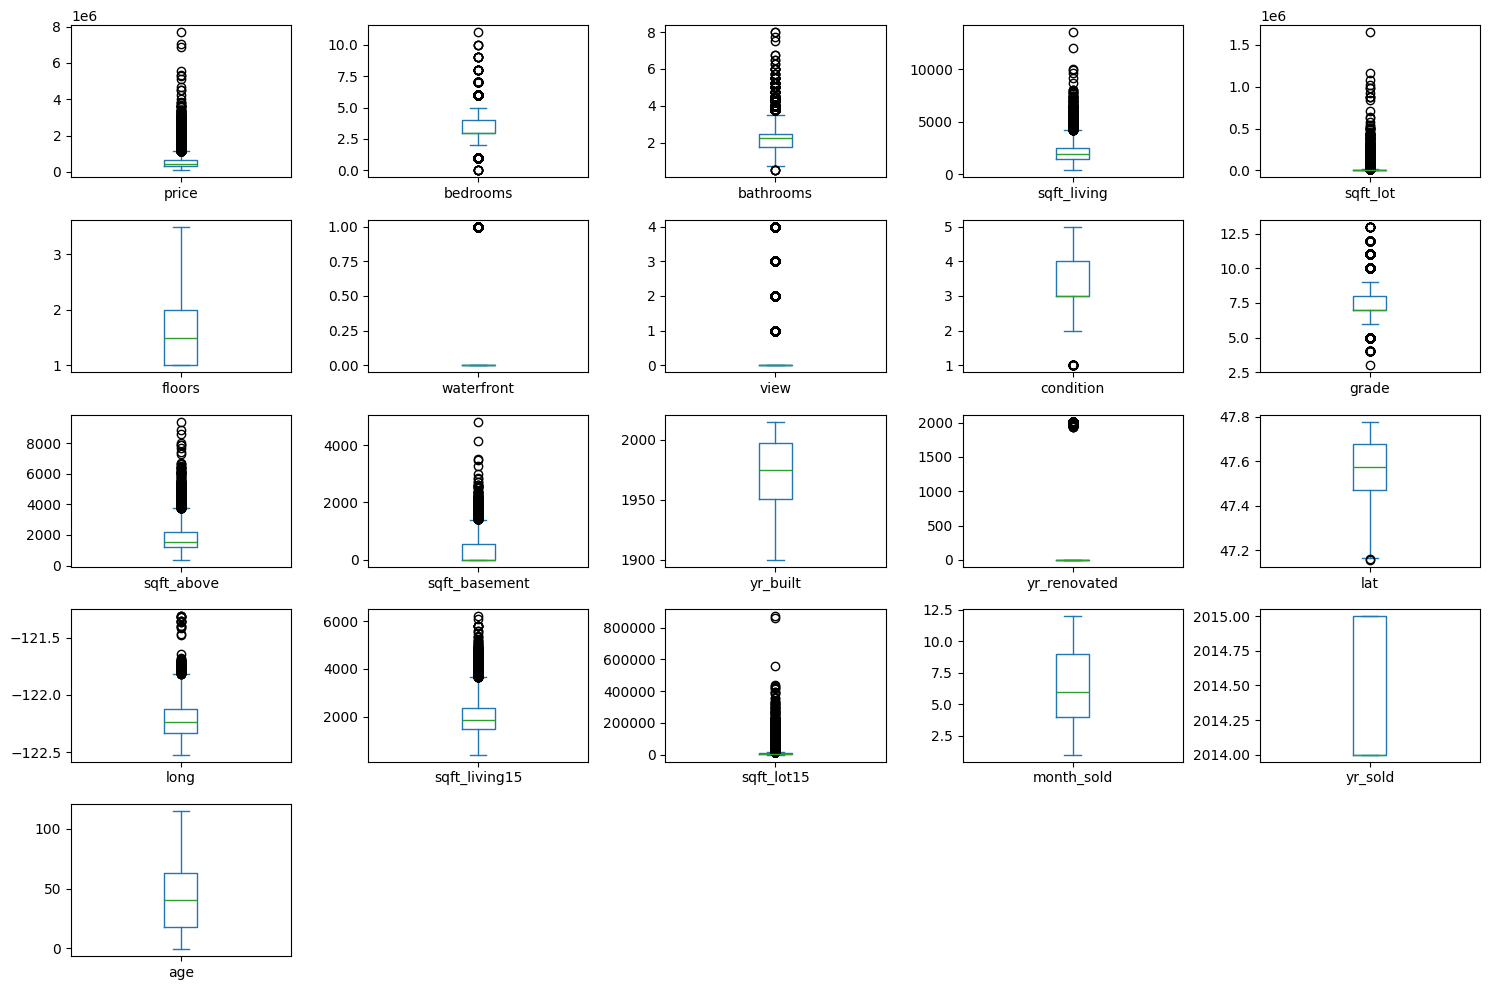

In [ ]:
datasetHousePrices.iloc[:, 0:].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

After conducting EDA, cleaning the dataset, transforming features, and imputating fields, here are our updated box-and-whiskers diagrams. Evident from the fields we have cleaned, certain number of values and outliers have depleted. For example, there are visibly fewer outliers for bathrooms and bedrooms. However, it may seem that there still remains a large portion of outliers that we have not accounted for. For many reasons, this is still suitable for our project. These outliers indicate the phenomenon of working with continuous data with a strong emphasis on practicality. Furthermore, this is the nature of working with house prices that have complex relationships with the features. This may indicate the unlikeliness of the data being synthesized or randomized. Furthermore, there is a fine line in data cleaning between making it suitable for models and actually deleting a crutial amount of data. We conducted a great analysis on the data and removed extreme outliers that did not make sense practically with the data in terms of housing. Making further implications is not appropriate for this project since we are not professional real-estate agents or professional builders. For further improvement for making this project practical and viable for real-use, it might be recommended to have an expert in the field to review the data's outliers. For this project, we will not pursue more deletion as we would like to avoid removing important data. 

### Correlation Matrix
The Correlation Matrix below shows how correlated each feature is to the price of the house that has been sold. This gives us a good first impression of what features might be more important than others. \
Moreover, we see that yr_renovated and is_renovated have an almost identical correlation. This tells us that the information whether the house has been renovated or not is sufficient and that we do not need the data of when the house has been renovated. Because of this, we can drop the column yr_renovated and work with the boolean variable only. 

In [24]:
(datasetHousePrices.corr(numeric_only=True))["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701925
grade            0.667849
sqft_above       0.605395
sqft_living15    0.585235
bathrooms        0.525895
view             0.397350
sqft_basement    0.323859
bedrooms         0.316068
lat              0.306810
waterfront       0.266436
floors           0.256635
yr_renovated     0.126449
is_renovated     0.126108
sqft_lot         0.089701
sqft_lot15       0.082494
yr_built         0.053861
condition        0.036176
long             0.022062
yr_sold          0.003833
month_sold      -0.010072
age             -0.053796
Name: price, dtype: float64

In [25]:
datasetHousePrices = datasetHousePrices.drop(['yr_renovated'], axis=1)
datasetHousePrices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,age,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,47.5112,-122.257,1340,5650,10,2014,59,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,47.7210,-122.319,1690,7639,12,2014,63,True
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,47.7379,-122.233,2720,8062,2,2015,82,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,47.5208,-122.393,1360,5000,12,2014,49,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,47.6168,-122.045,1800,7503,2,2015,28,False


This concludes our data cleaning and transformation. It is ready for further analysis and prediction

## Cleaned Dataset Conclusion
This gives a really good insight into the dataset and what we will be working with. \
This also concludes the data exploration and cleaning. \
We have removed 11 unrealistic outliers which was one house with 33 bedrooms and 10 houses without any sort of bathroom. \
Other than that, there were no significant or unrealistic outliers present. \
There was also some initial feature engineering where we re-worked the date column, added 2 columns isRenovated and age and removed the original date column. \
Now we can proceed with the Machine Learning Model.

# Using Machine Learning Models
For our dataset, we want to predict house prices. This makes it a regression problem as we want to predict the continuous variable for price. We are given the dataset with existing prices for each instance, meaning we will be working with labelled data. This implies that we will be working with supervised-learning models.

For the used performance metrics within the project, there may be several performance metrics we might use in our exploration with traditional machine learning models and the deep learning models individually to draw inferences. However, for conclusive findings and analysis, we will be working with RMSE and R2 score. RMSE is more interpretable in terms of price errors compared with MSE because it scales the result to the actual value. R2 score describes how well the model fits with the data. These are the performance metrics we will be using to compare the final models to draw conclusions.

For the train test split of the dataset, we will be using a 70-15-15 split for training, validation (split from training data), and testing. We will use training dataset to fit the models, use validation along the way to review the performance of the models, and after all the iterations of improvements we will use the test data to draw findings. We use this split because it is a balance between the 2 most common split ratios: 80-10-10 and 60-20-20. Moreover, the Deep Learning Model needs as many training data as possible. To ensure fair comparison between the models, we will be using the same training and testing split. This split also showcases a middle ground for the needs of both traditional ML and DL Models where traditional models need more data for validation while DL models benefit from large training data sets. 

#### Imports first

In [26]:
# Imports
from sklearn.model_selection import train_test_split

# 21603 data entries 
# 70 - 15 - 15 split 

x = datasetHousePrices.iloc[:,1:]
y = datasetHousePrices.iloc[:,0]

# first split into training and testing
x_main, x_test, y_main, y_test = train_test_split(x,y,test_size=0.15, random_state=1) # setting random state so that we always get the same result to simplify explanations

# now split the main data into train and validation
x_train, x_validation, y_train, y_validation = train_test_split(x_main,y_main,test_size=0.15, random_state=1) # setting random state so that we always get the same result to simplify explanations


Let us now create strong models that predict house prices.

## Traditional Machine Learning Models

## Deciding what Models to use 
My models will output a number which will represent the price of the house that has been sold. Based on this fact, I will be using Regression instead of Classification. The dataset is labelled which means that the Machine Learning is fully supervised. \

Thus, I have the following choices:

* Linear Regression: For now, this is my top choice because the Correlation Matrix shows a quite highly linearly related dataset which is best suited for Linear Regression. Moreover, Linear Regression is the most interpretable Machine Learning Model which is perfect for our goal: understanding house prices and what features impact the price. I will also be using Pipelines to further perfect the hyperparameters of the Linear Regression Model.
* Support Vector Machines (SVM) as Support Vector Regression (SVR): I can not simply use the SVM because they are used for classification. I could go one step further and use SVR which are an extension of SVM that create a hyperplane aswell but give me a continuous numerical value (the house price) as the output that I could use. An SVR  would be too complex to use for this problem, so I will be focusing on the simpler Models.
* Forest: They are highly interpretable and make a very good fit for my work. Using Decision Tree Forests would also allow me to use Bootstrapped datasets on my Model. They are also computationally heavy but lighter than SVRs. 
* Random Forest: This would make my Forest even more accurate but the big downside is the loss of interpretability which we value highly in this notebook, so I will not be using Random Forests here. 
* Boosting: This is an advancement from Decision Tree Forests where each tree learns from the mistakes of the previous tree. This is an improved

After this consideration, I decided to use Linear Regression first for this Project and see its performance. Then, I will use Pipelines to further tweak the Hyperparameters of this model. \
Afterwards, I will proceed to Forests and Boosting. \
Since I will be working with Linear Regression, my performance metric (cost function) will be the RSS (Residual Sum of Squares) since this is the best fit for Linear Regressions. I will also be using the Mean Squared Error (MSE) and the R2-Score as metrics.

#### Metrics to be used
* Residual Sum of Squares (RSS): this is a metric that quantifies the amount of error remaining in the Linear Regression model after it has been fitted to the dataset. It measures how well the model's predictions match the actual data points. The smaller the RSS, the better the fit is. We are aiming for a RSS = 0
* Mean Squared Error (MSE): this is a metric that quantifies the average squared difference between predicted and actual values. It squares each individual error and then averages those squared errors. The smaller the MSE, the better our model is making predictions, so we are aiming for a MSE = 0
* Root Mean Squared Error (RMSE): this is simply the root of the MSE. The reason I will be using this metric is that the RMSE is more interpretable than the MSE itself because it scales the result to the actual value. For example, an MSE of 1000$ and an RMSE of 100$ are big in difference but the RMSE can be interepreted as the following: "On average, our model's final price predictions are off by 100$"
* R2-Score: this metric is also called "coefficient determination" and it indicates how well the model fits the data. It eventually tells us the proportion of variance in the dependent variable that is predictable from the independent variables. The range is 0 to 1. A R2-Score of 1 is perfect and desired. \
. \
Overall, The MSE or RMSE should be used to compare model predictions because it averages the squared errors, so it does not depend on the number of datapoints used. If we use the RSS, it depends on the number of datapoints used which can vary from model to model. If we use more datapoints, the RSS will naturally be higher while the MSE will be around the same since it averages all the errors rather than just summing them up, making it more universal. The main issue with the RSS is that our price predictions are naturally high since we work with house prices which are in the thousands. 

In [27]:
# Imports

import sys
import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn

## Linear Regression

#### First, I will define a RSS function for easier use in this notebook

In [28]:
# define RSS function 
def RSS(y_observed, y_predicted):
    residuals = y_observed - y_predicted
    return sum(residuals**2)

# Define metrics function for easier use 
def metrics(ytest, predictions):
    MSE = mean_squared_error(ytest, predictions)
    RMSE = MSE ** (1/2)
    RSSTest = RSS(ytest, predictions)
    R2Score = r2_score(ytest, predictions)
    print("MSE: " + str(MSE))
    print("RMSE: " + str(RMSE))
    print("RSS: " + str(RSSTest))
    print("R2-Score: " + str(R2Score))

### First Prediciton
Now, let's instantiate a basic Linear Regression model and get a first prediction without any hyperparameter tuning or feature engineering done

In [29]:
modelLinReg = LinearRegression(fit_intercept=True)
modelLinReg.fit(x_train, y_train)

predictions = modelLinReg.predict(x_validation)
metrics(y_validation, predictions)

MSE: 40836810734.396866
RMSE: 202081.1983693606
RSS: 112505413573263.38
R2-Score: 0.6851275257484297


#### First Conclusion

* RMSE: My RMSE is 202,081$. This means that this Model's predicitons of the final house price on average are off by around 200,000$ which is extremely high, especially considering that the mean of the house prices is around 540,000$. This error is at 37.4% which is way too high. It is very important now to reduce this RMSE as much as possible in the next stept.
* R2-Score: My R2-Score is at 0.685 which indicates how well the model fits the datapoints. An R2-Score of 1 is desired as it means the model is a perfect fit. 0.685 is a good start as the model kind of mostly fits the data. But it should definitely be increased to at least 0.8.

### LASSO
Let's now try to improve the scores by applying LASSO. \
I use LASSO instead of RIDGE because the correlation matrix showed that not all parameters seem to be correlated highly and LASSO performs automatic feature selection. \
I will be using an alpha of 0.1 which indicates the penalty applied to the model and 0.1 is considered a good starting point. \
Later on, I will be using LassoCV in the Pipeline which automatically finds the best alpha value.

In [30]:
lasso_model = Lasso(alpha=0.1, random_state=1)
lasso_model.fit(x_train, y_train)
predictions = lasso_model.predict(x_validation)
metrics(y_validation, predictions)

MSE: 40836860867.71668
RMSE: 202081.32241183668
RSS: 112505551690559.47
R2-Score: 0.6851271391951663


### Interaction Terms
We can see the the result after applying LASSO is almost identical to the first run of the Linear Regression Model. This means that LASSO did not really remove many features. \
To help the model decide on what features to tune, I will add interaction terms as it adds more complex relationships. \
First, we need to look at what column we have and which ones might be interesting to combine based on real-life considerings.

In [31]:
datasetHousePrices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'yr_sold', 'age', 'is_renovated'],
      dtype='object')

Some interesting interactions would be the following:
* how important is the age and grade of the house? Is an old house but with a high grade still more expensive than just an old house?
* latitude and sqft_living: How much does the latitude affect the size of the house and the price? a big house in a popular area is way more expensive than a big house in a non-popular area.
* how does the size and the grade of the house interact in terms of the price? a big house with high grade rating is more expensive than a big house with bad grading. 


There should not be too many interaction terms added, as it complicates the model unnecessarily, so I will keep those for now.

In [32]:
datasetHousePricesInteraction = datasetHousePrices.copy()

# age X grade
datasetHousePricesInteraction['age_x_grade'] = datasetHousePricesInteraction['age'] * datasetHousePricesInteraction['grade']

# lat X sqft_living
datasetHousePricesInteraction['sqft_living_x_lat'] = datasetHousePricesInteraction['sqft_living'] * datasetHousePricesInteraction['lat']

# sqft_living x grade
datasetHousePricesInteraction['sqft_living_x_grade'] = datasetHousePricesInteraction['sqft_living'] * datasetHousePricesInteraction['grade']

#### Re-splitting the data
Because I have added new interaction terms, I have to split my data again so include all features.

In [33]:
# 21603 data entries 
# 70 - 15 - 15 split

xInteract = datasetHousePricesInteraction.iloc[:,1:]
yInteract = datasetHousePricesInteraction.iloc[:,0]

# split into training and testing
x_mainInteract, x_testInteract, y_mainInteract, y_testInteract = train_test_split(xInteract,yInteract,test_size=0.15, random_state=1)

# now split the main data into train and validation
x_trainInteract, x_validationInteract, y_trainInteract, y_validationInteract = train_test_split(x_mainInteract,y_mainInteract,test_size=0.15, random_state=1)

In [34]:
# LASSO again here after Interaction Terms

lasso_model = Lasso(alpha=0.1, random_state=1)
lasso_model.fit(x_trainInteract, y_trainInteract)
predictions = lasso_model.predict(x_validationInteract)

metrics(y_validationInteract, predictions)

MSE: 34741965614.221214
RMSE: 186391.9676762419
RSS: 95714115267179.45
R2-Score: 0.7321218656260382


We can see that there has been quite a big improvement by using interaction terms with LASSO compared to just applying LASSO without any feature engineering. \
Our RMSE went down by 15,690$ which is quite significant already but we can do better! \
For the R2-Score, we got an improvement from 0.6851 to 0.7321 which is a difference of 0.047 and is now closer to our desired minimum of 0.8. \
Let's next automatically tune those hyperparameters of Linear Regression using a Pipeline

### Using a Pipeline
#### What is a Pipeline?

* Chains multiple data processing steps into one function
* Tunes Hyperparameters automatically
* Prevents data leaking -> makes sure only training data infos are used
* Is more convenient as it bundles an entire workflow

Here are the components explained:
* StandardScaler: scales each feature so it has a mean of 0 and std deviation of 1
Prevents terms to dominate due to naturally higher numbers
* Poly Features: adds polynomial terms of degree 2 as well as interaction terms
* LassoCV: performs LASSO with k-fold cross-validation (5 folds). Because it automatically performs k-fold cross-validation, we need to use a dataset that consists of only training and testing which I will do below.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LassoCV

# x_main, x_test, y_main, y_test = train_test_split(x,y,test_size=0.15, random_state=1) 

# from this code above, we have the following split:
# x_main will be the training set consisting of 85%
# x_test will be the testing data which consists of 15%
# I am using this code to ensure the split is still the same to ensure comparability

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', LassoCV(cv=5, random_state=1))])

pipeline.fit(x_main, y_main)
prediction = pipeline.predict(x_test)
metrics(y_test, prediction)

MSE: 26860403097.85638
RMSE: 163891.43692657154
RSS: 87054566440152.53
R2-Score: 0.7927378779131864


In [36]:
final_lasso_model = pipeline.named_steps['lasso']
feature_names = pipeline.named_steps['poly_features'].get_feature_names_out(x.columns)

print("Key Parameters Found by LassoCV")
print("Best Alpha: " + str(final_lasso_model.alpha_))

coefficients = pd.Series(final_lasso_model.coef_, index=feature_names)

print()
print("Deleted Features by LassoCV")
print(coefficients[coefficients == 0].reindex(coefficients[coefficients == 0].abs().sort_values(ascending=False).index))
print()


print("Total features created: " + str(len(coefficients)))
print("Features kept by LASSO: " + str(len(coefficients[coefficients != 0])))
print("Features deleted by LASSO: " + str(len(coefficients[coefficients == 0])))

print([name for name in feature_names if '^2' in name])


Key Parameters Found by LassoCV
Best Alpha: 1119.0213876301107

Deleted Features by LassoCV
bedrooms                  -0.0
sqft_lot                   0.0
waterfront                 0.0
view                       0.0
sqft_basement              0.0
                          ... 
month_sold age             0.0
month_sold is_renovated    0.0
yr_sold^2                  0.0
yr_sold age                0.0
yr_sold is_renovated      -0.0
Length: 105, dtype: float64

Total features created: 230
Features kept by LASSO: 125
Features deleted by LASSO: 105
['bedrooms^2', 'bathrooms^2', 'sqft_living^2', 'sqft_lot^2', 'floors^2', 'waterfront^2', 'view^2', 'condition^2', 'grade^2', 'sqft_above^2', 'sqft_basement^2', 'yr_built^2', 'lat^2', 'long^2', 'sqft_living15^2', 'sqft_lot15^2', 'month_sold^2', 'yr_sold^2', 'age^2', 'is_renovated^2']


#### Findings of using the Pipeline
* RMSE: 163,891.4369
* R2-Score: 0.7927

This result is a bit better than only using Linear Regression with interaction terms. \
When compared to the interaction term Linear Regression, the RMSE is lower by 22,500.5307$ and our R2-Score is at 0.79273 now which is very close to the desired 0.8 threshhold. \
This shows that using a Pipeline is very effective in tuning Hyperparameters as an improvement of around 22,500$ equals around 4.2% of the mean house value. \
The R2-Score of 0.7927 equals to a model of strong explanatory power. An R2-Score of 1.0 is impossible when using complex data like house price prediction. 

##### Some more insights into the Pipeline
* LassoCV created aa total of 230 features and deleted 105 of those, resulting in using 125 of the created features. 
* Some of the created features are 'bedrooms^2', "month_sold x age', 'floors^2'
* The most ideal hyperparameter alpha was found to be 1,119


## Forests
Let's now move on to Forests. 

First, some imports again

In [37]:
from sklearn.ensemble import (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)
from matplotlib.pyplot import subplots

The default value for number of trees in a Forest is 100, let's go with this number for now and tune it later on. \
I will set the number of parameters to consider in each split to be all of them which makes my RF function create a Forest rather than a Random Forest. \
Furthermore, the function will automatically apply bagging to the dataset because it is fundamental when creating a Forest since it reduces overfitting and improves accuracy. Without Bagging, there would be only one singular Decision Tree rather than a Forest of Trees.

In [38]:
# Instantiating and fitting the model -> already bagged

# use normal dataset because forests automatically consider interactions
forestModelBag = RF(max_features=x_train.shape[1], random_state=0)
forestModelBag.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


MSE: 15219367580.256948
RMSE: 123366.80096467181
RSS: 41929357683607.89
R2-Score: 0.8633026367641743


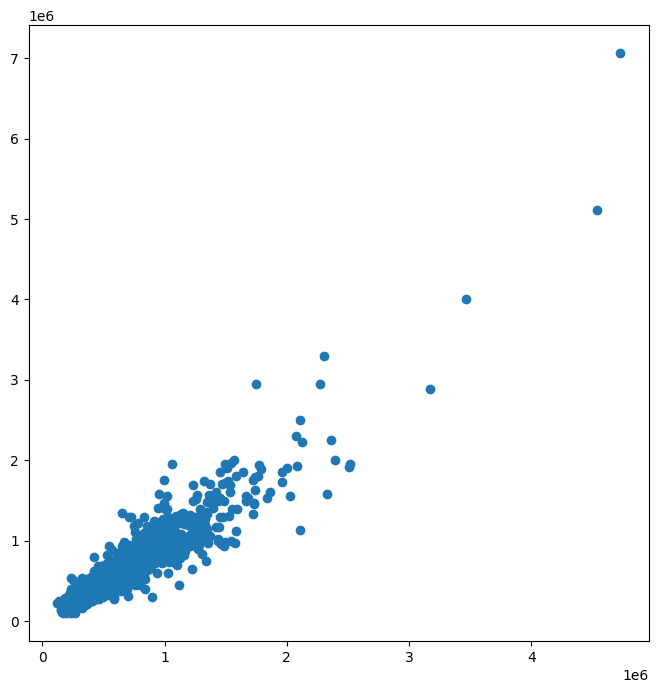

In [39]:
# get first predictions
predictions = forestModelBag.predict(x_validation)
metrics(predictions, y_validation)


ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions, y_validation)


### Findings
* RMSE: My RMSE is 123,366.8 which is a huge improvement from the Linear regression which had an RMSE of 163,891.4369. This means that we cut our average error per final price prediction by around 40,000$ which is very significant as it is around 7.4% of the mean house price. The overall improvement from the initial Linear Regression model is 78,633.2 which equals to 14.6% of the mean house value. This shows that using a Decision Tree Forest is a huge improvement and more suitable model to predict house prices of our dataset. 
* R2-Score: our R2-Score now is 0.8633 which is also a huge improvement from above. We now surpassed the desired threshhold of 0.8 by quite a bit. This means that our model now describes more data correctly than the Linear Regression model.

### Optimizing Hyperparameter
Let's now tune the Hyperparameter of how many trees to use to get the ideal performance of this Forest. \
Because Forests need me to set the Number of Trees as a Hyperparameter before training the model, I need to figure out which number will give me the best result. \
The main reason is that too many trees will eventuall just stabilize the reduction of MSE / RMSE to 0 and it will linearize, resulting in useless computation time and power. \
I will train lots of models and find which one has the Minimum MSE and what number of trees will give me that number to then finalize my model.

<function matplotlib.pyplot.show(close=None, block=None)>

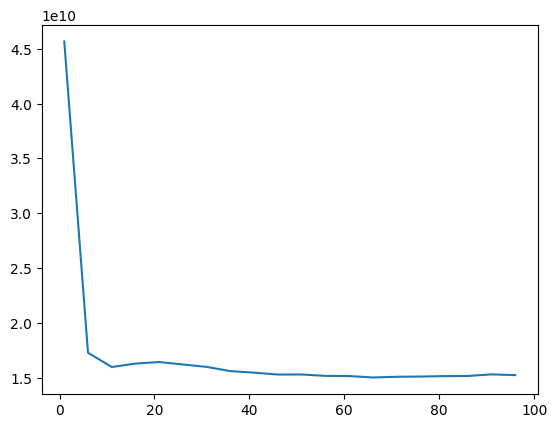

In [ ]:
# runtime around 2:40 minutes

listMSE = {} # saves all MSE we get

for i in range(1,100, 5): # go in steps of 5 up to 100
    forestModelBagTemp = RF(max_features=x_train.shape[1], n_estimators=i, random_state=0)
    forestModelBagTemp.fit(x_train, y_train)
    predictionTemp = forestModelBagTemp.predict(x_validation)
    listMSE[i] = mean_squared_error(y_validation, predictionTemp)

# getting the min MSE from the dicitonary
minMSE = min(listMSE.values())

# plot the graph for visualization
plt.plot(list(listMSE.keys()), list(listMSE.values()))
plt.show

In [44]:
# min MSE found
print("Min MSE: " + str(minMSE))

# now find fitting key to MSE in the dictionary
target_value = minMSE
result = 0

found_keys = []
for key, value in listMSE.items():
    if value == target_value:
        result = key

# print number of trees that resulted in the minimum MSE

print("Ideal Hyperparameter: " + str(result))

Min MSE: 15038341681.625612
Ideal Hyperparameter: 66


I have now found that the ideal Hyperparameter is n = 66 trees. \
Though it might not seem like a huge difference, using only 66 trees instead of 100 is a big saving in unnecessary computation power. \
As the graph above shows, at first, the MSE reduces rapidly with more trees being used but at around 100, it just starts stabilizing and linearizing, so using more trees is not beneficial at all. \
I will now instantiate the final Decision Tree Forest model by using the Hyperparameter n = 66 trees and see the results

In [ ]:
# Instantiating and fitting the model -> already bagged
forestModelBag = RF(max_features=x_train.shape[1], n_estimators=66, random_state=0)
forestModelBag.fit(x_train, y_train)

predictions = forestModelBag.predict(x_validation)
metrics(y_validation, predictions)

MSE: 15038341681.625612
RMSE: 122630.91649998222
RSS: 41430631332878.555
R2-Score: 0.8840467762105244


#### Conclusion of the Forest
* Forest with n = 100, RMSE = 123,366.8
* Forest with n = 66, RMSE = 122,630.9

Although, the improvement of tuning the Hyperparameter might not seem significant, the saving in computation power and time is huge and the main gain in this procedure. Using only 66 trees instead of 100 is way more efficient. This gain makes the one-time computation to find the ideal number of  trees worth it. Though, it would be better to put the range only up to 100 first and then seeing whether the ideal parameter is less than 100 or at 100 and then change the range accordingly. 

In [ ]:
feature_names = list(datasetHousePrices.columns)

feature_imp = pd.DataFrame({'importance':forestModelBag.feature_importances_},index=feature_names[1:])
feature_imp.sort_values(by='importance', ascending=False)

,importance
grade,0.303557
sqft_living,0.287324
lat,0.164806
long,0.071837
sqft_living15,0.031625
waterfront,0.020727
sqft_above,0.020655
view,0.015557
sqft_lot,0.015492
age,0.013790


This importance table tells me the most important features that were determined by my Forest model. \
The higher the importance, the more important this feature was in reducing the MSE in each split. \
This forest tells me that the grade and sqft_living with the long and lat (as location) were the most important features with the rest being gradually less significant.

### Random Forest
I will now look into Randomizing the Forest and see its perfromance. \
I will go through the exact same procedure as above and tune the Hyperparameter of number of trees.

In [ ]:
# Instantiating and fitting the model -> already bagged
randomForestModelBag = RF(max_features=4, random_state=0)
randomForestModelBag.fit(x_train, y_train)

predictions = randomForestModelBag.predict(x_validation)
metrics(y_validation, predictions)

MSE: 18553685884.130497
RMSE: 136211.9153529914
RSS: 51115404610779.51
R2-Score: 0.8569416936396101


### Hyperparameter tuning

In [ ]:
# runtime 2:40 minutes

listMSE = {}

for i in range(1,200, 5):
    randomForestModelBagTemp = RF(max_features=4, n_estimators=i, random_state=0)
    randomForestModelBagTemp.fit(x_train, y_train)
    predictionTemp = randomForestModelBagTemp.predict(x_validation)
    listMSE[i] = mean_squared_error(y_validation, predictionTemp)

# getting the Min MSE from the dictionary
minMSE = min(listMSE.values())    

In [ ]:
#Min MSE found
print("Min MSE: " + str(minMSE))

#Now I need to find the fitting key to the MSE in the dictionary
target_value = minMSE
result = 0

found_keys = []
for key, value in listMSE.items():
    if value == target_value:
        result = key

# Print the number of trees that resulted in the minimum MSE

print("ideal Hyperparameter n: " + str(result))

Min MSE: 18244022172.03837
ideal Hyperparameter n: 121


<function matplotlib.pyplot.show(close=None, block=None)>

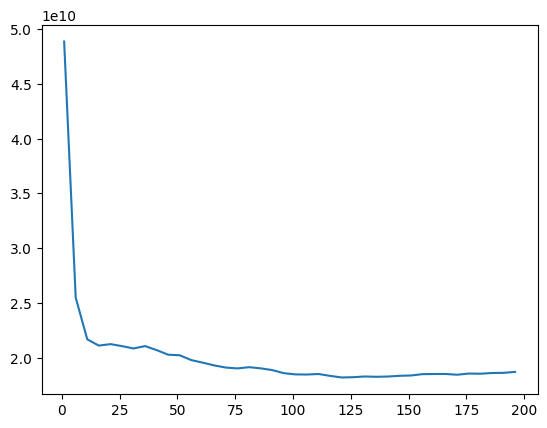

In [ ]:
plt.plot(list(listMSE.keys()), list(listMSE.values()))
plt.show

Here, we can see that actually using more than the standardized 100 trees gives the best result. \
This is why it is important to always identify the best hyperparameter for the number of trees when working with forests.

In [ ]:
# Instantiating and fitting the model -> already bagged
forestModelBag = RF(max_features=4, n_estimators=121, random_state=0)
forestModelBag.fit(x_train, y_train)

predictions = forestModelBag.predict(x_validation)
metrics(y_validation, predictions)

MSE: 18244022172.03837
RMSE: 135070.43411508814
RSS: 50262281083965.71
R2-Score: 0.8593293575501576


#### Conclusion of Random Forest
After tuning the Hyperparameter and finding out that 121 trees is the ideal number rather than the standard 100 trees, I found the following results:
* RMSE: 135,070.43 which is an improvement of around 1,200$ from the non-tuned Random Forest.
* R2-Score: 0.859. This score is still above our set threshhold of 0.8 which is good!

But, the Random Forest overall performs worse than our Decision Tree Forest! \
This could be because most of our predictors are quite strong, so forcing the Random Forest to disregard some of them can lower the performance. Or, our features are not highly correlated in the first place which makes a Random Forest kind of useless since that is its main task. \

* RMSE Forest: 122,630.9$
* RMSE Random Forest: 135,070.43$

We can see that the Forest's RMSE is lower by 12,439.53$ which is very high! Also, our R2-Score is better by around 0.3 \
Those results clearly show that the Forest should be used without Randomizing it, as it's performance plummets when doing so. \
Additionally, we can also see that the Random Forest requires way more trees to reach the ideal state. It needs 121 trees while the Forest only needs 66 trees to reach peak performance. The Forest only needs 50% of the trees which is a huge difference in computational power and time.

### Boosting
Lastly, I will dive into Boosting. \
There are 2 different Boosting Methods that I will choose from:
* AdaBoost: 
Focuses on misclassified instances in each iteration, weighting them higher.
* Gradient Boosting: 
Uses a gradient descent approach to minimize a loss function by fitting new models to the errors (residuals) of previous models. 

I will go with the Gradient Boosting Model because it directly minimized the model's residuals since it builds the new trees directly correct the residuals from its predecessor. \ 
AdaBoost only adjusts the weights based on the errors which is less direct. \
Overall, Gradient Boosting is known to be more powerful and flexible. 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#max_features=x_train.shape[1] is the default to use all parameters. and we saw that regular forests outperform random ones so we will stick with a regular forest approach for this boosting

gradientBoostingModel = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=1)
gradientBoostingModel.fit(x_train, y_train)

predictions = gradientBoostingModel.predict(x_validation)
metrics(y_validation, predictions)

MSE: 15022344360.00976
RMSE: 122565.67366114282
RSS: 41386558711826.89
R2-Score: 0.8841701236548521


## Conclusion of Traditional Machine Learning Models

For the Traditional Machine Learning Models, the final conclusion was that the Boosting Model outperformed all other models, including the Linear Regression Model with Pipelines which had the following statistics: \
RMSE: 163,891.43$, R2-Score: 0.7927 \
while the Boosting Model yielded the following statistics: \
RMSE: 122,565.67$, R2-Score: 0.8841 \
This improvement is huge as the RMSE was lowered by around 25%. When putting this to relation with the mean house value which is around 540,000$, a reduction of 41,326$ equals 7.7%. \
An R2-Score of 0.8841 is very good, especially considering the complex nature of housing prices with many features. \ 
As for the Traditional Machine Learning Models, this contradicts a popular statement of "using simpler models is mostly better", as the Boosting Model outperformed the Linear Regression Model. \

## Deep Learning Models

Before we start instantiating a neural network and fit the model with the training set, we must review from a pool of available deep learning models and evaluate what we will be using for prediciting house prices. 

* Multi-Layer Perceptron (MLP) / Fully-Connected Neural Network (FNN) - This is the most common and fundamental deep learning model used in various applications. This neural network is made up of an input layer, hidden layer(s), and an output layer. Each neuron in every layer is connect to every neuron in the next layer, hence the "fully-connected" neural network. It learns by adjusting weights and finding patterns. This model is great for structured and tabular data with a flat list of features, which is most suited with our dataset. Furthermore, it is a recommended model for regression problems, such as predicting house prices.
* Convolutional Neural Networks (CNNs) - Suitable model for processing topological data. This model is not suitable for our needs as my dataset has no spatial relationships. For example, a dimensionality of the dataset does not imply anything about the concurrent dimension. Furthermore, the use of convolutional layers and pooling excels in cases similar to image recognition rather than simple regression.
* Recurrent Neural Networks (RNNs) - This model works with sequential data that implements memory through feedback loops. This model is not suitable for our dataset because our dataset is not sequential and is not in time-series.
* TabNet - This is a model made by Google that selects the most important features at each step. For this project, we will not be working with this model as it may not be the best overall representative of the performance of traditional deep learning models for our regression problem. Furthermore, I would like to focus on the models we have learnt in class to better apply the knowledge I have learnt for the course.

After reviewing all of the possible models, I have decided to work with a Multi-Layer Perceptron (MLP) / Fully-Connected Neural Network (FNN) for this regression problem. Since we will be working with one model, we will be focusing on hyperparameter-tuning, reviewing the impact of each change on the cost function, and following general practices of a deep learning engineer, such as working with tensors.

Let us first import the required libraries for creating MLPs.

In [ ]:
# Imports for scaling and tensorflow
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

warnings.filterwarnings('ignore')

### Creating a Basic Neural Network

We will start with a basic neural network with an input layer consisting of neuron inputs for each feature, a hidden layer of 32 neurons, and an output layer for the output neuron. This model is created using Sequential and Dense from the tensorflow library. We will also initialize all of the random states to enable reproducability throughout the entire project. 

Here is the general diagram of how the model looks like:

![alt text](image1.png)

In [ ]:
# For reproducability
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Create the neural network shape
modelMPL = Sequential([
    Dense(32, input_shape=[x_train.shape[1]]),
    Dense(1)
])

# Showcase information about the model
modelMPL.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_160 (Dense)               │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

The summary describes the number of parameters, overall shape and size of the neural network, and certain details of the amount of bytes it takes for trainable parameters. With Dense, we are able to control the number of neurons and hidden layers of the neural network. More neurons allows the model to learn more features and create more complicated combinations of these variables within a layer. Increasing the number of layers allows the network to learn more complex and abstract patterns regarding the dataset. However, we need to ensure that we keep a balance of tuning the number of neurons and layers as it could lead to overfitting, increased computational cost, and the arising issue of exploding/vanishing gradients where the updated weights can be extremely small or large, leading to the model unable to converge to an optimal solution easily. 

We will start here and gradually tune the model to achieve the best results. Let us now compile the structure of the neural network. Compile allows us to convert the created shape of the model into an executable deep learning model. For now, we will use the recommended hyperparameters.

In [ ]:
# Compile the shape of the model
modelMPL.compile(optimizer='adam', loss='mean_squared_error')

The optimizer is the used algorithm that updates the model's weights during training to minimize the loss function, which in this case we set it to reduce the MSE. Now let us start training the model. 

The fit function takes in a few hyperparameters. It takes the training dataset, the validation dataset, epochs and batch_size. Epochs refers to the number of passes through the entire training dataset, while batch size is a subset of data used to update parameters. Having larger epochs leads to better model performance as the model's weights continuously change with each iteration, leading to a minimized error. However, very large number of epochs will lead to overfitting and a long computation time. A large batch size leads to faster training and lower computation time. Furthermore, the convergence path of gradients become more stable and less noisy. However, with a very large batch size, it may lead to a generalization gap with an implication on overfitting. It is also extremely memory intensive.

It is important to find the best balance between the extremities of epochs and batch size to mitigate as much of the disadvantages as possible. For now, we must tune other hyperparameters before deciding on epochs and batch size as we want to reduce the computation time of the entire project as much as possible. We will set epochs to 10 to see the interative minimization, and will set the batch size to 1000 to have faster computation times.

In [ ]:
# Train the model
trainingHistory = modelMPL.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=1000,
    validation_data=(x_validation, y_validation),
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 421020958720.0000 - val_loss: 415754059776.0000
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 413799612416.0000 - val_loss: 408744656896.0000
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 406816915456.0000 - val_loss: 401904795648.0000
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 399985836032.0000 - val_loss: 395147771904.0000
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 393226977280.0000 - val_loss: 388420206592.0000
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 386499772416.0000 - val_loss: 381710565376.0000
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 379805270016.0000 - val_loss: 375045783552.0000
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 373182365696.0000 - val_loss: 368485138432.0000
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 366700068864.0000 - val_loss: 362111336448.0000
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

The loss refers to the loss function result on training set, while val_loss refers to the loss function result on validation data. We will use epochs to see how much the loss function dips at each iteration. For training loss, if it differs a lot from the val_loss, it may indicate overfitting. In general for val_loss, if the rate of reduction in values start to dip exponentially, or if the values start to increase, it may indicate overfitting. It is best to not interate the dataset further than this plateau. With just 10 epochs, we were able to go from 415754059776 to 356017471488 with our validation loss, which is a 14.37% reduction. Let us now explore data scaling to better interpret the data.

### Data Scaling, Using Tensors, Shuffling Data, and Changing Loss Function
Before we tune the hyperparameters, we must change the environment of the data we are working with and how we compare results. Our dataset consists of variables with extremely large numbers and variables with small numbers. This fluctuation in scaling will inadvertently make the neural network favouring features. We must scale our data. Data scaling is extremely important for neural networks to prevent irregular convergence, allow for equal contribution of features, and for is overall better model performance. When we use the dataset for the model, we must apply the scaler to the dataset before giving it to the model. When we provide the test data and make the model predict for Y values, we must inverse scale the prediction to compare the performance metrics RMSE and R2 score with the best traditional machine learning model. 

Now for the scaler, there is StandardScaler and MinMaxScaler. StandardScaler scales the dataset while ensuring that the mean is 0 and the standard deviation is 1. Whereas the MinMaxScaler squishes the datapoints between 0 and 1. Although MinMaxScalers might be appropriate for certain activation functions such as sigmoid and tanh, it is not suitable for our dataset as it highly seceptible to outliers within the dataset, which our dataset is not suitable for the scaler in terms of the number of extreme outliers evidently from our EDA. Furthermore, the nature of outliers in our dataset is due to certain extremities such as mansions or cheap houses for the homeless. This means we cannot just remove these outliers. Using StandardScaler is the most appropriate for our needs.

With the scaled data, we will apply the use of tensors. It is a popular data structure that allows for efficient storage and computation. Using tensors, we can set shuffle buffer, batch sizes, and apply prefetch for faster computation times. These measures must be taken as working with deep learning emphasizes the balance and trade-off between computation time and model performance. 

We will be shuffling the training data as it helps prevent bias and improve generalization of the model.

Lastly, I changed the hyperparameter of the targetted loss function to reduce in compile to Mean Absolute Error (MAE) as it is less sensitive to outliers compared to Mean Squared Error (MSE).

Let us now apply these changes and fit the model. With the new val_loss, we will use this reference to see the rate of improvements throughout the remaining project.

In [ ]:
# Apply StandardScaler on dataset
stdScaler_x = StandardScaler()
stdScaler_y = StandardScaler()
# X and Y scalers are created seperately to prevent bias in transformation
# Training is used to fit these scalers, validation and test will be simply transformed using the scalers

# Transform training and validation datasets to scale
X_train_scaled = stdScaler_x.fit_transform(x_train)
y_train_reshaped = y_train.values.reshape(-1, 1)
Y_train_scaled = stdScaler_y.fit_transform(y_train_reshaped)

X_valid_scaled = stdScaler_x.transform(x_validation)
y_valid_reshaped = y_validation.values.reshape(-1, 1)
Y_valid_scaled = stdScaler_y.transform(y_valid_reshaped)

# Define batch size and shuffle buffer size for computation time saving
BATCH_SIZE = 1000
SHUFFLE_BUFFER_SIZE = 1000 # Recommended buffer size for shuffling data effectively

# Create tensors and batch the datasets
trainTensor = tf.data.Dataset.from_tensor_slices((X_train_scaled, Y_train_scaled)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validTensor = tf.data.Dataset.from_tensor_slices((X_valid_scaled, Y_valid_scaled)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Instantiate the same model again
modelMPL = Sequential([
    Dense(32, input_shape=[x_train.shape[1]]),
    Dense(1)
])
modelMPL.compile(optimizer='adam', loss='mean_absolute_error')

# Remove the batch_size argument from the fit call and provide the tensors directly
trainingHistory = modelMPL.fit(
    trainTensor,
    epochs=10,
    shuffle = True,
    validation_data=validTensor,
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9438 - val_loss: 0.6090
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5854 - val_loss: 0.4604
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4390 - val_loss: 0.3686
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3643 - val_loss: 0.3326
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3368 - val_loss: 0.3208
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3260 - val_loss: 0.3165
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3219 - val_loss: 0.3152
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3210 - val_loss: 0.3148
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3214 - val_loss: 0.3149
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3226 - val_loss: 0.3147


With just 10 epochs, we were able to go from 0.6090 to 0.3147 with our validation loss, which is a 48.33% reduction. There is also a minimal difference between loss and val_loss, which is a good sign as it does not indicate overfitting or underfitting. However, with just 10 epochs, our values are starting to plateau. This indicates that any more epochs may lead to overfitting. We might have to adjust the batch size and epochs later. For now, let us now explore our findings for the most suitable number of layers and neurons for our model.

### Finalizing the Structure of the Fully-Connected Neural Network

Deciding the neural network structure is important right now before we tweak other hyperparameters since it may impact the validity of the model. We could iterate through all of the possible neuron combinations and number of hidden layers to find the best structure for the model. However, it would be extremely computationally demanding. To minimize computation time, we will follow general practices from other deep learning engineers. Firstly, many variables, sizes, and structural data, such as the number of neurons, are typically in the powers of 2. For this search, I will iterate it through 256, 128, 64, 32, and 16 neurons as options. Secondly, I will run through iterations for up to 5 hidden layers. If the best result reaches the highest extremity of most neurons and most layers from the options, I will increase the search parameter. Lastly, I will follow the funnel principle. The general recommended numbers of neurons always follow the funnel principle where data and weights from one layer with be pushed to the next layer with smaller number of neurons. This is done until the final layer with one neuron for output. This follows the idea of iteratively getting closer to the output at each layer. Now let us run the algorithm below to find the best neural network shape for our model.

In [ ]:
# Required import for better algorithm writing, making code more readable
import itertools

# Variables for number of neurons, layers and storing the best result
num_hidden_layers_options = [2, 3, 4, 5]
neuron_options = [256, 128, 64, 32, 16] # Sorting from largest to smallest is important for the funnel check
results = {}

# Go through the number of hidden layers
for num_layers in num_hidden_layers_options:

    # Create all neuron combinations
    neuron_combos = list(itertools.product(neuron_options, repeat=num_layers))
    print(f"Testing for {num_layers} hidden layers!")

    # Iterate through all neuron combinations
    for combo in neuron_combos:
        
        # Ensures funnel check
        is_strict_funnel = all(combo[i] > combo[i+1] for i in range(len(combo) - 1))
        if not is_strict_funnel:
            continue

        # Build the model
        model = Sequential()
        model.add(Dense(combo[0], input_shape=[x_train.shape[1]]))
        
        for neurons in combo[1:]:
            model.add(Dense(neurons))
            
        model.add(Dense(1))

        # Compile and fit
        model.compile(optimizer='adam', loss='mean_absolute_error')
        history = model.fit(
            trainTensor,
            epochs=10,
            validation_data=validTensor,
            verbose=0
        )

        # Store the result
        final_val_loss = history.history['val_loss'][-1]
        results[combo] = final_val_loss


# Find the best results and output
if results:
    best_architecture = min(results, key=results.get)
    best_loss = results[best_architecture]
    print("Results:")
    print(f"The best strict funnel architecture is: {best_architecture} neurons per layer")
    print(f"Resulting in a validation loss of: {best_loss}")

Testing for 2 hidden layers!
Testing for 3 hidden layers!
Testing for 4 hidden layers!
Testing for 5 hidden layers!
Results:
The best strict funnel architecture is: (64, 16) neurons per layer
Resulting in a validation loss of: 0.31481772661209106


As you could tell, even taking precautions towards computation time, it still took around a minute to find the best neural network structure. Please be mindful that some code blocks might take a long time to compute. However, it will not be an unreasonable amount of around 10 minutes. I have ensured to take necessary steps to balance between computation time and model performance. 

Now, from our search, a MLP with two hidden layers retrieved the best results. The first hidden layer consists of 64 neurons and the second hidden layer consists of 16 neurons. 

Here is the updated diagram of the structure of our model:

![alt text](image2.png)

The change for validation loss is quite minimal. However, the search did imply the need for another layer to create more complex inferences with the data. However, up until now there is no activation function specified within our model. In simple terms, it is nothing but a linear model. We will look more into this hyperparameter and tune the model.

### Selecting the Best Activation Function

The activation function introduces non-linearity to the model, allowing for our network to better learn and understand complex patterns from the dataset. This is a hyperparameter set during the construction of the network structure with Dense. There are various activation functions. We will go through various available functions and determine the best function that retrieves the best val_loss within the 10 epochs. To better visualize the differences between the functions, I will be plotting a bar graph of the results. During the testing, the output neuron's activation function is set to linear as it is most recommended by deep learning professionals for simple regression problems, such as predicting house prices. The output neuron simply has to output the regression, which does not require a specific activation function.

Final validation MAE for 'relu': 0.2735
Final validation MAE for 'sigmoid': 0.3313
Final validation MAE for 'tanh': 0.2974
Final validation MAE for 'elu': 0.2834
Final validation MAE for 'selu': 0.3027
Final validation MAE for 'softplus': 0.2923
Final validation MAE for 'swish': 0.2737
Final validation MAE for 'gelu': 0.2614
Final validation MAE for 'linear': 0.3148


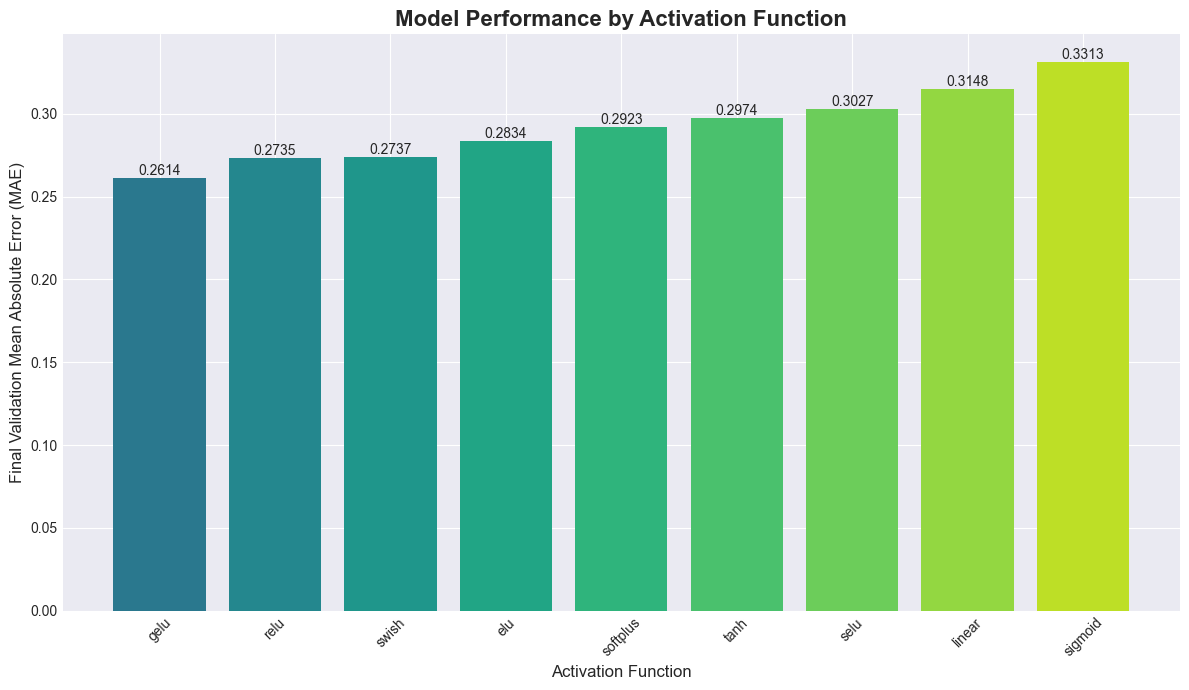

In [ ]:
# Variable for the activation functions we will be iterating through 
activation_functions = ['relu','sigmoid','tanh','elu','selu','softplus','swish','gelu','linear']
results = {}

# Create, compile, and train the model for each activation function
for activation_name in activation_functions:    
    
    # Build the model with the activation function
    modelMPL = Sequential([
        Dense(64, activation=activation_name, input_shape=[x_train.shape[1]]),
        Dense(16, activation=activation_name),
        Dense(1, activation='linear') 
    ])

    # Compile
    modelMPL.compile(optimizer='adam', loss='mean_absolute_error')

    # Train
    trainingHistory = modelMPL.fit(
        trainTensor,
        epochs=10,
        validation_data=validTensor,
        verbose=0 # Set to 0 to hide epoch output
    )

    # Store the final val_loss to compare
    final_val_loss = trainingHistory.history['val_loss'][-1]
    results[activation_name] = final_val_loss
    print(f"Final validation MAE for '{activation_name}': {final_val_loss:.4f}")

# Sort the results by loss for easier comparison
sorted_results = sorted(results.items(), key=lambda item: item[1])

# Plot the bar graph
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 7))

activations = [item[0] for item in sorted_results]
losses = [item[1] for item in sorted_results]

bars = ax.bar(activations, losses, color=plt.cm.viridis(np.linspace(0.4, 0.9, len(losses))))

ax.set_ylabel('Final Validation Mean Absolute Error (MAE)', fontsize=12)
ax.set_xlabel('Activation Function', fontsize=12)
ax.set_title('Model Performance by Activation Function', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Add loss values on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

plt.tight_layout()
plt.show()

Going through the results, GELU and ReLU retrieved the best results on validation error. 

ReLU follows the function:\
f(x) = max(0, x)\
It overcomes the vanishing gradient problem since it ensures that the gradients flowing backward remain non-zero and do not vanish.

GELU (Gaussian Error Linear Unit) is a probabilistic version of ReLU. Although GELU retrieved better results compared to ReLU, we will be sticking with ReLU for various reason. ReLU is the go-to recommended activation function that is suitable for almost any problem. The main reason however lies within the computation time. GELU is extremely accurate and even used for NLPs. However, it has a heavy computation time. We want to reduce this as much as possible for later when we adjust batch size and epochs. We will use ReLU as it already overcomes the vanishing gradient problem.

Here are the results of the current model:

In [ ]:
# Scale the test data for later since we finalized scaler
X_test_scaled = stdScaler_x.transform(x_test)

# Create the updated model
modelMPL = Sequential([
    Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Compile
modelMPL.compile(optimizer='adam', loss='mean_absolute_error')

# Fit
trainingHistory = modelMPL.fit(
    trainTensor,
    epochs=10,
    validation_data=validTensor,
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6390 - val_loss: 0.3871
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3915 - val_loss: 0.3451
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3429 - val_loss: 0.3166
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3204 - val_loss: 0.3018
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3028 - val_loss: 0.2898
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2910 - val_loss: 0.2820
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2823 - val_loss: 0.2756
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2766 - val_loss: 0.2705
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2730 - val_loss: 0.2665
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2692 - val_loss: 0.2636


Comparing to our previous model iteration's result, we were able to go from 0.3148 to 0.2636 with our validation loss, which is a 16.26% reduction. There is also a minimal difference between loss and val_loss, which is a good sign as it does not indicate overfitting or underfitting. Let us now set up another hyperparameter.

### Selecting the Best Optimizer
We will now go through various availible optimizers and plot graphs to view the results for each optimizer: one for general bar chart result of the final epoch, and another plot of the performance over each epoch. I will be conducting this algorithm with 30 epochs to get a general view of how the optimizers impact the performance.

Final Validation MAE for 'sgd': 0.3046
Final Validation MAE for 'rmsprop': 0.2197
Final Validation MAE for 'adam': 0.2315
Final Validation MAE for 'adadelta': 0.8971
Final Validation MAE for 'adagrad': 0.4067
Final Validation MAE for 'adamax': 0.2536
Final Validation MAE for 'nadam': 0.2301


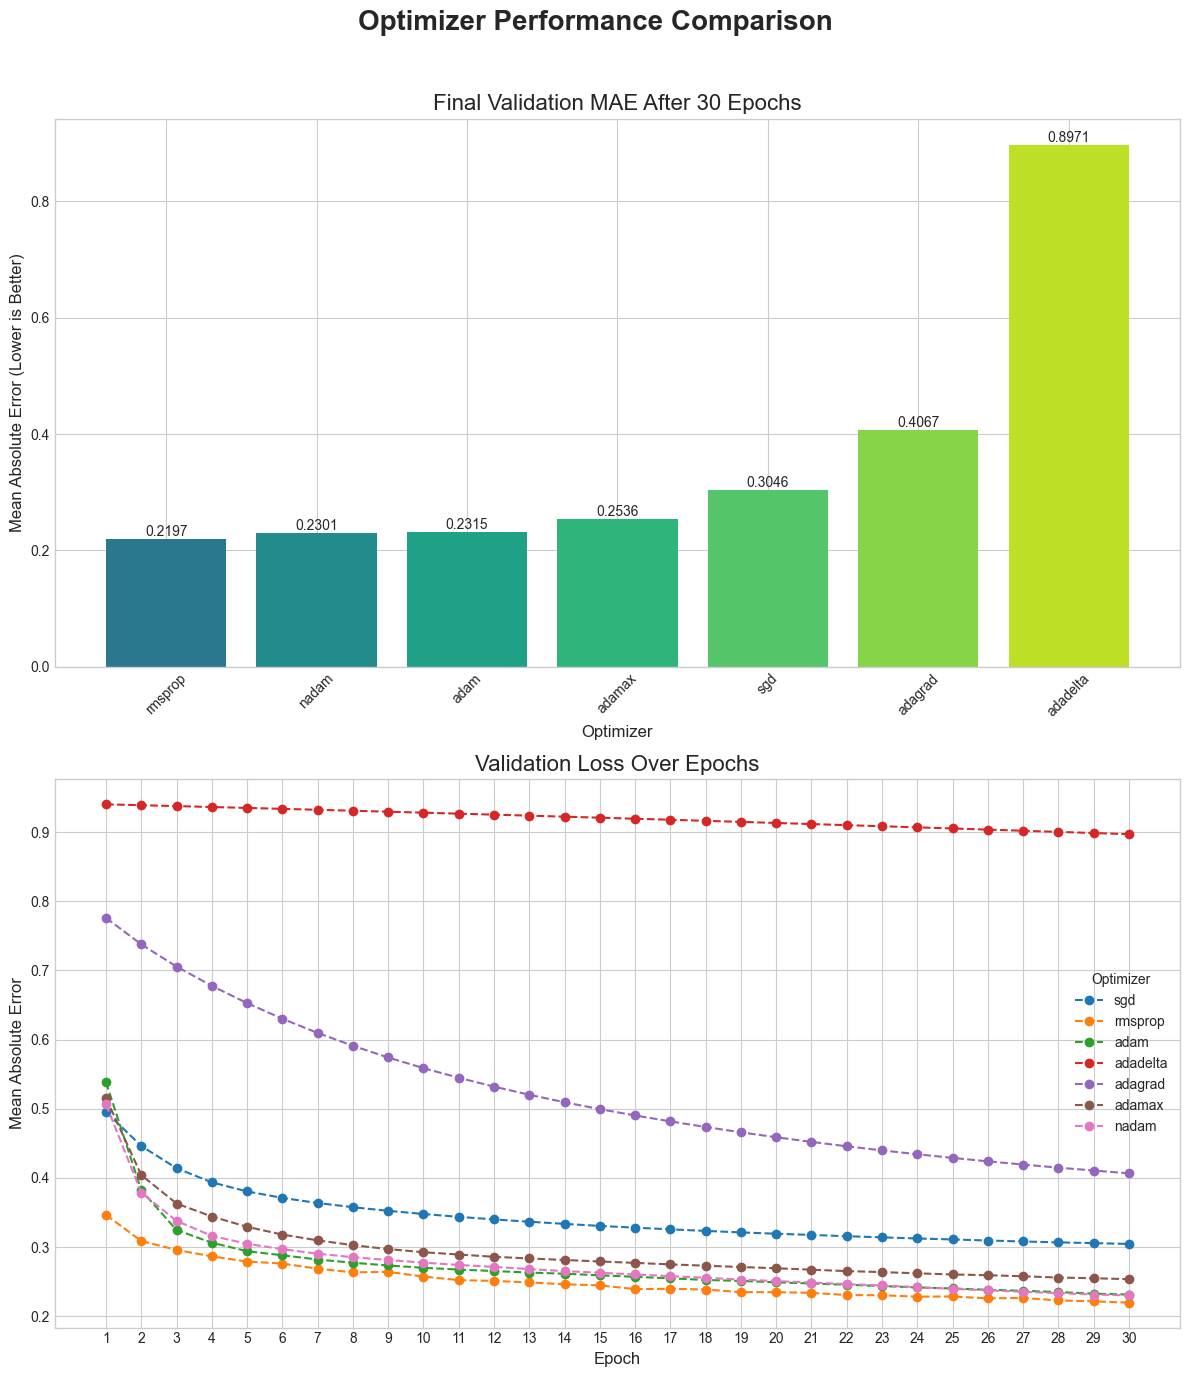

In [ ]:
# List of optimizers we will be iterating through
optimizers_list = ['sgd','rmsprop','adam','adadelta','adagrad','adamax','nadam']

# Dictionaries to store the results
final_losses = {}
history_dict = {}

# Check for each optimizer
for optimizer_name in optimizers_list:

    # Build
    modelMPL = Sequential([
        Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Compile with optimizer
    modelMPL.compile(optimizer=optimizer_name, loss='mean_absolute_error')

    # Fit the model
    history = modelMPL.fit(
        trainTensor,
        epochs=30,
        validation_data=validTensor,
        verbose=0  
    )

    # Store results
    final_val_loss = history.history['val_loss'][-1]
    final_losses[optimizer_name] = final_val_loss
    history_dict[optimizer_name] = history.history['val_loss']
    print(f"Final Validation MAE for '{optimizer_name}': {final_val_loss:.4f}")


# Sort the results for the bar chart
sorted_optimizers = sorted(final_losses.items(), key=lambda item: item[1])
optimizer_names_sorted = [item[0] for item in sorted_optimizers]
final_losses_sorted = [item[1] for item in sorted_optimizers]

# Create a figure with two subplots
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
fig.suptitle('Optimizer Performance Comparison', fontsize=20, fontweight='bold')

# Plot 1: Final Validation Loss (Bar Chart)
colors = plt.cm.viridis(np.linspace(0.4, 0.9, len(final_losses_sorted)))
bars = ax1.bar(optimizer_names_sorted, final_losses_sorted, color=colors)

ax1.set_title('Final Validation MAE After 30 Epochs', fontsize=16)
ax1.set_ylabel('Mean Absolute Error (Lower is Better)', fontsize=12)
ax1.set_xlabel('Optimizer', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add loss values on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')


# Plot 2: Validation Loss Progression (Line Chart)
epochs_range = range(1, 31)
for optimizer_name, val_loss_history in history_dict.items():
    ax2.plot(epochs_range, val_loss_history, label=optimizer_name, marker='o', linestyle='--')

ax2.set_title('Validation Loss Over Epochs', fontsize=16)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Mean Absolute Error', fontsize=12)
ax2.legend(title='Optimizer')
ax2.set_xticks(epochs_range) # Ensure integer ticks for epochs

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

After 30 epochs, the RMSprop optimizer performs the best. RMSprop is an optimizer that gives each parameter its own adaptive learning rate. It works by keeping a moving average of the squared gradients for each parameter. Even considering the second plot, the green optimizer's performance showcases a gradual decrease in MAE with each epoch. It does however slowly decrease the rate of reduction and starts to plateau. But we have yet to find the optimal MAE. We must now tweak the batch size and number of epochs. 

### Changing Batch Size and Epochs
Let us now iterate through every possible batch size for 10 epochs and graph the results over each epoch.


Training with batch size: 8
Final Validation MAE: 0.1962
Training Time: 35.15 seconds

Training with batch size: 16
Final Validation MAE: 0.1976
Training Time: 18.31 seconds

Training with batch size: 32
Final Validation MAE: 0.2029
Training Time: 9.78 seconds

Training with batch size: 64
Final Validation MAE: 0.2134
Training Time: 5.35 seconds

Training with batch size: 128
Final Validation MAE: 0.2240
Training Time: 3.30 seconds

Training with batch size: 256
Final Validation MAE: 0.2197
Training Time: 2.14 seconds

Training with batch size: 512
Final Validation MAE: 0.2383
Training Time: 1.61 seconds

Training with batch size: 1024
Final Validation MAE: 0.2615
Training Time: 1.40 seconds


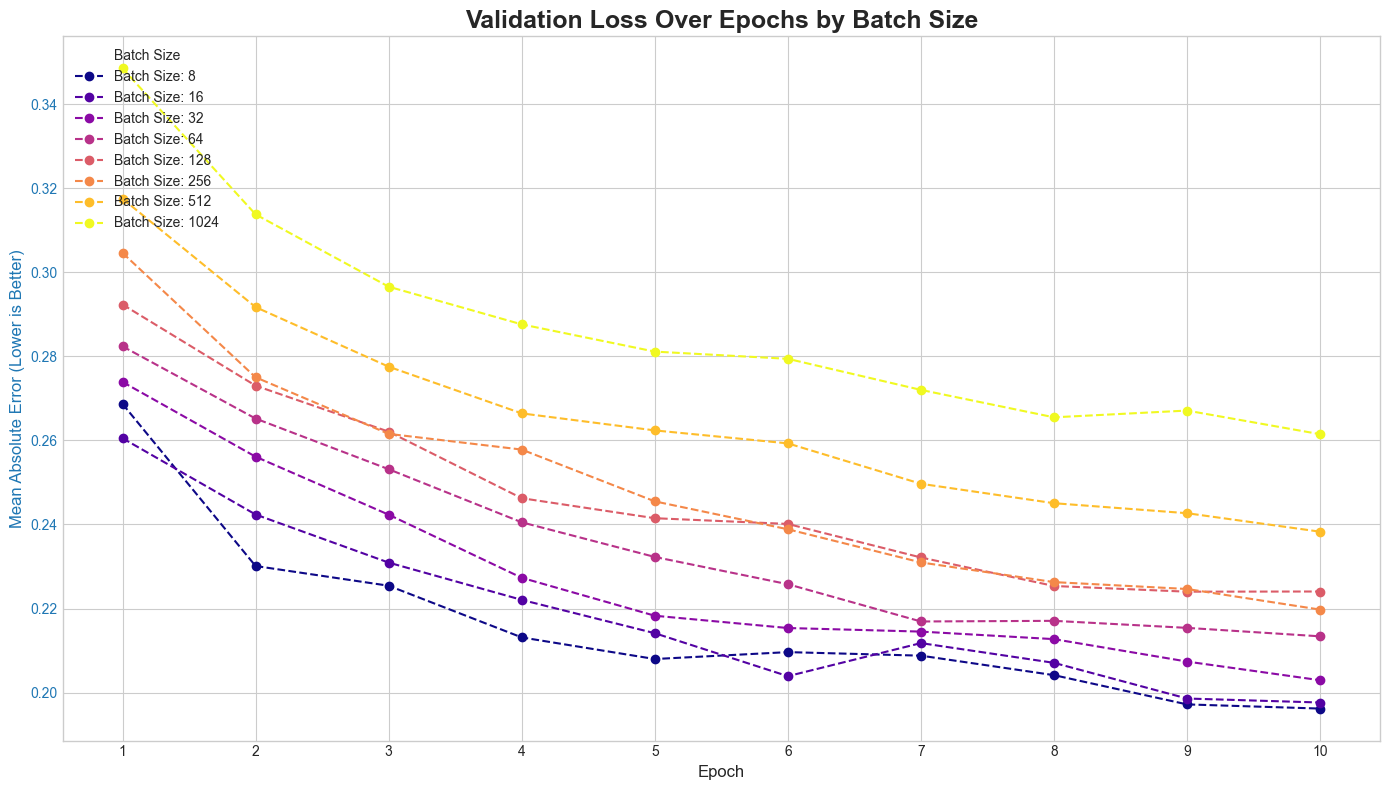

In [ ]:
# Check computation time
import time

# List of batch sizes to iterate 
batch_size_options = [8, 16, 32, 64, 128, 256, 512, 1024]

# Dictionaries to store the results
history_dict = {}
training_times = {}

# Iterate through each batch size
for batch_size in batch_size_options:
    print(f"\nTraining with batch size: {batch_size}")

    # Update the tensor
    BATCH_SIZE = batch_size
    SHUFFLE_BUFFER_SIZE = 1024

    trainTensor = tf.data.Dataset.from_tensor_slices((X_train_scaled, Y_train_scaled)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
    validTensor = tf.data.Dataset.from_tensor_slices((X_valid_scaled, Y_valid_scaled)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
        
    # Build model
    modelMPL = Sequential([
        Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Compile the model
    modelMPL.compile(optimizer='rmsprop', loss='mean_absolute_error')

    # Train the model and time it
    start_time = time.time()
    history = modelMPL.fit(
        trainTensor,
        epochs=10,
        validation_data=validTensor,
        verbose=0  # Keep output clean during the loop
    )
    end_time = time.time()

    # Store the results
    history_dict[batch_size] = history.history['val_loss']
    training_times[batch_size] = end_time - start_time
    print(f"Final Validation MAE: {history.history['val_loss'][-1]:.4f}")
    print(f"Training Time: {training_times[batch_size]:.2f} seconds")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the results
ax1.set_title('Validation Loss Over Epochs by Batch Size', fontsize=18, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Mean Absolute Error (Lower is Better)', fontsize=12, color='tab:blue')

epochs_range = range(1, 11)
colors = plt.cm.plasma(np.linspace(0, 1, len(batch_size_options)))

for i, (batch_size, val_loss_history) in enumerate(history_dict.items()):
    ax1.plot(epochs_range, val_loss_history, label=f'Batch Size: {batch_size}', color=colors[i], marker='o', linestyle='--')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(title='Batch Size', loc='upper left')
ax1.set_xticks(epochs_range)

fig.tight_layout()
plt.show()

After reviewing the effectiveness of changing batch size, it is extremely evident that it has an impact on the MAE loss function. Batch sizes 8, 16, and 32 are around 0.20 MAE. This is a great performance boost from using just 1000 as our batch size. Although 8 as the batch size retrieves the best results, the computation time is extremely heavy. We will settle for 16 as it exponentially reduces our computational time from 35 seconds to 18 seconds. Using 32 might reduce our ability to reach the best MAE for more epochs.

In [ ]:
# Finalized batch size
BATCH_SIZE = 16

trainTensor = tf.data.Dataset.from_tensor_slices((X_train_scaled, Y_train_scaled)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validTensor = tf.data.Dataset.from_tensor_slices((X_valid_scaled, Y_valid_scaled)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

### Adding Regularization
The values already plateau with 10 epochs. I want to implement regularization to allow for more epoch iterations while avoiding overfitting. Let us go through a pool of regularization techniques and graph the performances of each technique.


Training Baseline Model (No Regularization)

Training Model with L1 (Lasso) Regularization

Training Model with L2 (Ridge) Regularization

Training Model with L1_L2 (ElasticNet) Regularization

Training Model with Dropout Regularization

Training Model with Batch_Norm Regularization


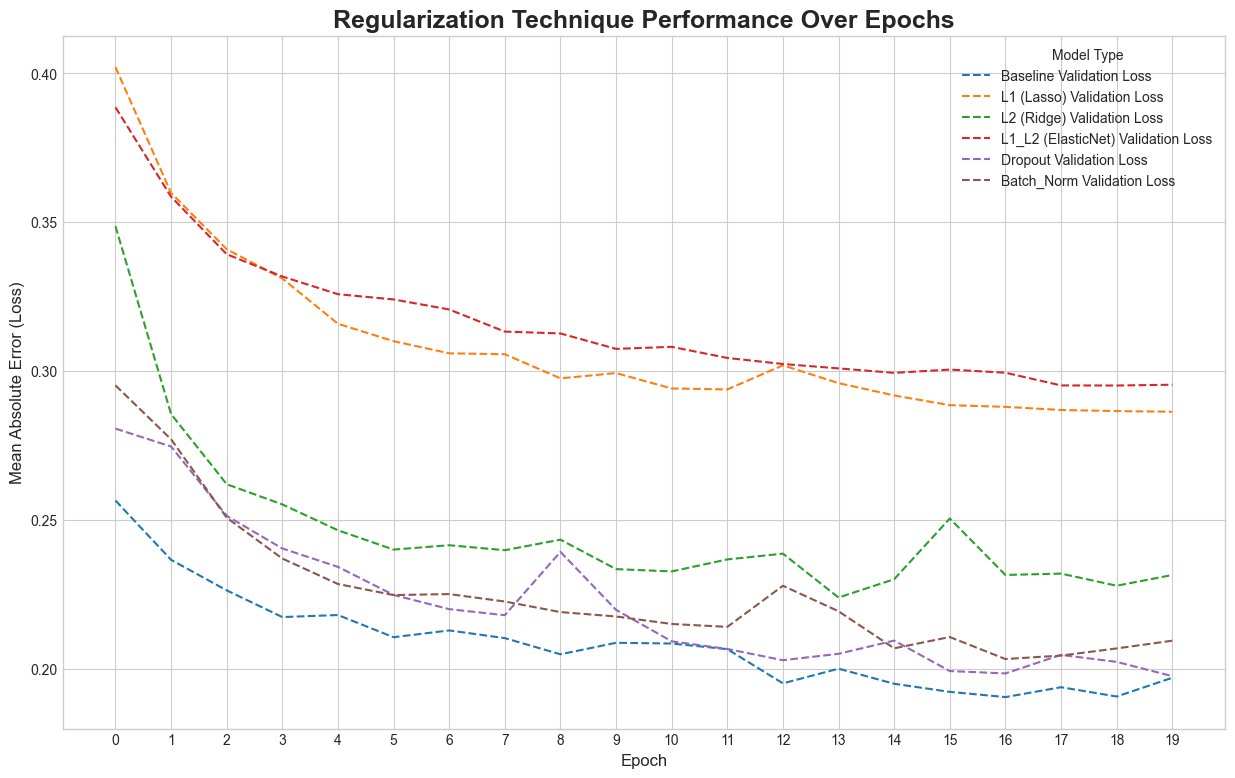

In [ ]:
# Required imports for regularization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

print("\nTraining Baseline Model (No Regularization)")
history_dict = {}

# Build, compile, fit model
model_baseline = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model_baseline.compile(optimizer='rmsprop', loss='mean_absolute_error')

history_baseline = model_baseline.fit(
    trainTensor,
    epochs=20,
    validation_data=validTensor,
    verbose=0
)

history_dict['Baseline'] = history_baseline.history


# Create and train regularized models
regularization_options = {
    'L1 (Lasso)': {'type': 'kernel', 'reg': regularizers.l1(0.01)},
    'L2 (Ridge)': {'type': 'kernel', 'reg': regularizers.l2(0.01)},
    'L1_L2 (ElasticNet)': {'type': 'kernel', 'reg': regularizers.l1_l2(l1=0.01, l2=0.01)},
    'Dropout': {'type': 'layer', 'rate': 0.3},
    'Batch_Norm': {'type': 'layer_bn'}
}

# Loop through each regularization technique
for name, config in regularization_options.items():
    print(f"\nTraining Model with {name} Regularization")

    model = Sequential()
    
    # Build the model based on regularization
    if config['type'] == 'kernel':
        model.add(Dense(64, activation='relu', kernel_regularizer=config['reg'], input_shape=[X_train_scaled.shape[1]]))
        model.add(Dense(32, activation='relu', kernel_regularizer=config['reg']))
    
    elif config['type'] == 'layer': # Dropout
        model.add(Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]))
        model.add(Dropout(config['rate']))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(config['rate']))

    elif config['type'] == 'layer_bn': # Batch Normalization
        model.add(Dense(64, use_bias=False, activation='relu', input_shape=[X_train_scaled.shape[1]]))
        model.add(BatchNormalization())
        model.add(Dense(32, use_bias=False, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(1, activation='linear')) # Final layer
    
    # Add the final output layer if not already added (for kernel and dropout)
    if config['type'] != 'layer_bn':
        model.add(Dense(1, activation='linear'))

    # Compile and fit
    model.compile(optimizer='nadam', loss='mean_absolute_error')
    history = model.fit(
        trainTensor,
        epochs=20,
        validation_data=validTensor,
        verbose=0 # Keep output clean
    )
    history_dict[name] = history.history


# Plot graph
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 9))

for name, history in history_dict.items():
    plt.plot(history['val_loss'], label=f'{name} Validation Loss', linestyle='--')

plt.title('Regularization Technique Performance Over Epochs', fontsize=18, fontweight='bold')
plt.ylabel('Mean Absolute Error (Loss)', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(title='Model Type', fontsize=10)
plt.grid(True)
plt.xticks(np.arange(0, 20, step=1))
plt.show()

We can see the performance iterations for each regularization technique. I will choose to implement batch normalization as the regularization technique for this model. Although dropout and baseline have lower MAE, the point is not about finding the best MAE. Rather, it is about the continuity of reduction. In dropout, there is a lot of sudden peaks, which may emphasize noise. Batch normalization has a bit of noise, but it does gradually decrease the loss function over each epoch. Essentially it retrieves the same output as baseline while allowing for more epochs as it is less prone to overfit. This regularization technique normalizes the inputs to each layer, preventing the vanishing/exploding gradient problem. As it reduces impact of changes of distant layers, it allows for faster training, adds noise to the activations which acts as a regularizer, and has reduced sensitivity to initialization. This makes it suitable for our model's predictive power. Now let us finalize the model.

### Finalizing the Model Through Early Stopping
As noticed earlier, we have yet to finalize and run more epochs. This is our strongest MLP yet thus far. We will now run the predictive power over several epochs on val_loss and evaluate its performance. Rather than finding the best number of epochs, we will implement early stopping. The main benefit of it is that it prevents our model from overfitting while saving computational time. Let us now run the model.

In [ ]:
# Import Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# Define the finalized model with Batch Normalization
final_model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    Dense(16),
    BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    Dense(1, activation='linear') 
])

# Compile the model
final_model.compile(optimizer='rmsprop', loss='mae')

# Define the Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model with the Early Stopping callback
history = final_model.fit(
    trainTensor,
    validation_data=validTensor,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1
)

print("\nModel training finished.")

Epoch 1/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4523 - val_loss: 0.2922
Epoch 2/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3507 - val_loss: 0.2627
Epoch 3/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3367 - val_loss: 0.2565
Epoch 4/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3210 - val_loss: 0.2500
Epoch 5/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3123 - val_loss: 0.2364
Epoch 6/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3174 - val_loss: 0.2326
Epoch 7/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3098 - val_loss: 0.2316
Epoch 8/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3133 - val_loss: 0.2247
Epoch 9/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3060 - val_loss: 0.2357
Epoch 10/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2967 - val_loss: 0.2324
Epoch 11/100
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3065 - val_loss: 0.2289
Epoch 12/100
976/976 ━━━━━━━━━━━━━━━━━━━━

Our model was able to run for 22 epochs and have a val_loss of 0.2089, which is an additional 20.75% reduction in MAE. This is our best result yet. It was able to generalize better than the training set, which the loss was 0.2902. This infers that the dataset for validation is not a representative of the training set, but the model was still able to generalize well to the unseen data. With early stopping, it rolled back to epoch number 22 from 32 as it was able to detect overfitting via the gradual increase in val_loss towards the end. Let us now check the performance of the model on test data and graph its prediction points.

In [ ]:
from sklearn.metrics import mean_squared_error

# Generate predictions on the test set
y_pred = final_model.predict(X_test_scaled)
y_pred_unscaled = stdScaler_y.inverse_transform(y_pred)
y_pred_unscaled = y_pred_unscaled.flatten()

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred_unscaled)
mse = mean_squared_error(y_test, y_pred_unscaled)
rmse = np.sqrt(mse)
rss = np.sum((y_test - y_pred_unscaled)**2)
r2 = r2_score(y_test, y_pred_unscaled)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Mean Absolute Error (MAE): ${mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): ${rmse}")
print(f"Residual Sum of Squares (RSS): {rss}")
print(f"R-squared (R2) Score: {r2}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- Model Performance Metrics ---
Mean Absolute Error (MAE): $79500.35382417175
Mean Squared Error (MSE): 21258283052.650352
Root Mean Squared Error (RMSE): $145802.20523932535
Residual Sum of Squares (RSS): 68898095373639.79
R-squared (R2) Score: 0.8359653486448949


For the metrics we care about, our unscaled Root Mean Squared Error (RMSE) is $145802.2052 and the unscaled R-squared (R2) Score is 0.8360. The RMSE in conjuction to the mean of the dataset's price field $540126.0720, the RMSE is around 27% of the mean, which is still quite bad in terms of error. In practical situations, we will need a stronger model or stronger data cleaning process to achieve better practicality with the usage of our model. Now, let us now look at the plotted predictions.

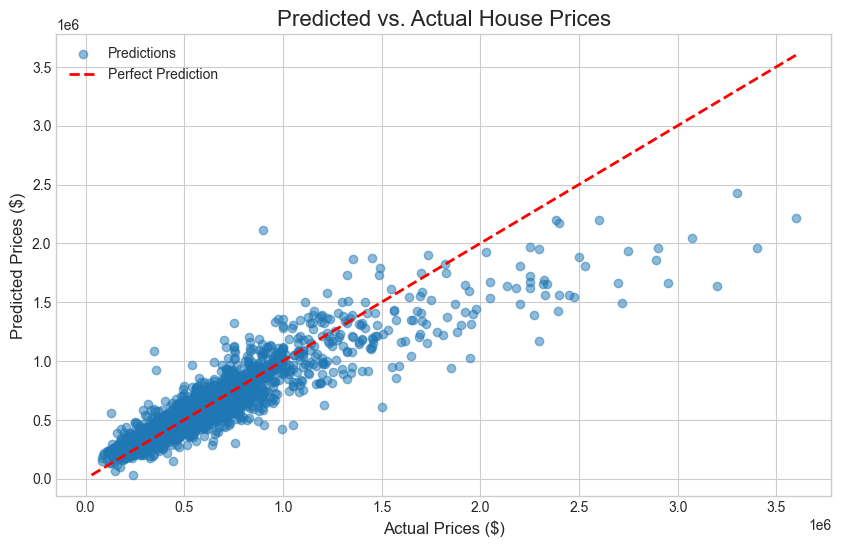

In [ ]:
# Create a scatter plot to compare predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_unscaled, alpha=0.5, label='Predictions')

# Add a red dashed line for perfect predictions (where y=x)
min_val = min(y_test.min(), y_pred_unscaled.min())
max_val = max(y_test.max(), y_pred_unscaled.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Add labels and title for clarity
plt.title('Predicted vs. Actual House Prices', fontsize=16)
plt.xlabel('Actual Prices ($)', fontsize=12)
plt.ylabel('Predicted Prices ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The predictions seem to deviate from the actual prices somewhat logarithmically. This implies that our hyperparameter tuning process should have been focused more on accuracy over computational time. Running the hyperparameter tuning over more epochs and smaller batch sizes will allow us to get a stronger predictive power. In conclusion of this analysis with regards to our house prices dataset, tuning this single model took a lot of computation power and time. The practicality of setting a deep learning model for this dataset seems unsuitable. This implies we would possibly need a larger dataset with more instances to train with. For this project, it is safe to conclude that deep learning has potential for accurately predicting unseen values. However, the computational needs and iterative process of tuning a single model makes it impactical for this project scale. 

## Running Best Traditional Machine Learning Model on Test Data

In [ ]:
# Running Boosting on test data

predictions = gradientBoostingModel.predict(x_test)
metrics(y_test, predictions)

MSE: 14008463104.436893
RMSE: 118357.3534024688
RSS: 45401428921479.97
R2-Score: 0.8919069166749722


# Final Conclusion

For the best Traditional Machine Learning Model Gradient Boosting, we have the following statistics when run on the final test data: \
RMSE: 118,357.353$ \
R2-Score: 0.8919 

Although the final RMSE of 118,357.353$ seems massively better than what we started with, when putting this to relation with the mean house price of 540,000$, our RMSE is still immensely high which is not good. It is around 22% of the mean house price. But compared to all other models, this is by far the lowest result we achieved. 



For the Deep Learning Model \
RMSE: 145,802.205$ \
R2-Score: 0.8360 \
This RMSE score of 145,802.205$ per prediction is even higher than the Boosting Model and is 27% of the mean house price. 


As a final conclusion, it can be said that although the Deep Learning model could have performed better than the best Traditional Machine Learning Model with more hyperparameter tuning and iterations, it is way more complicated and computationally heavy than the Boosting Model. Furthermore, creating the Deep Learning model requires a much deeper understanding of the matter in order to create such a good model. \
For the project application, the Traditional Machine Learning Model such as a Gradient Boosting Regressor yields better results than the complex Deep Learning Model while it is way easier to interpret and set up. This is important because people that use such model in the context of prediction house prices, like salespeople or potential buyers will not always (or barely) have such deep understanding of Deep Learning. Even though the stakeholders do not need to know how the model works, the overal approch to how it generalizes makes the Boosting Model better than the Deep Learning Model by quite a bit. 

For real-life applications, our hyperparameter-tuned models are insignificant for the real world due to the large percentage of mean occupation from the RMSE. With better data cleaning by professionals, further tuning, larger datasets, and with more computational resources, it will make these models practical for real-life problem-solving. However, we have achieved the goal of the project, which was to explore the differences between traditional machine learning models and deep learning models in the situation of regression. We were able to find a suitable model for our dataset, reduce the RMSE as much as possible, and draw conclusions through comparisions. 